# 4. Spatio-temporal diversity of must 

In [1]:
!mkdir /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/macrofungi/berries

In [2]:
workdir = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/macrofungi/berries'
%cd $workdir

/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/macrofungi/berries


In [3]:
%env TMPDIR=/scratch/lfloerl/tmpdata

env: TMPDIR=/scratch/lfloerl/tmpdata


In [4]:
import qiime2 as q2
from qiime2 import Visualization
from qiime2 import Artifact
from qiime2 import Metadata
from qiime2.plugins.diversity.visualizers import alpha_group_significance
from qiime2.plugins import diversity as q2d


import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr


%matplotlib inline

In [5]:
md = Metadata.load('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv')
taxonomy = q2.Artifact.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/taxonomy.qza')

# Diversity 

In [8]:
table = q2.Artifact.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/macrofungi/avaulx/must_filtered_table.qza')

* 10'000: Retained 3’400’000 (26.33%) features in 340 (95.51%) samples

* **15'000**: Retained 4’845’000 (37.51%) features in 323 (90.73%) samples

In [10]:
Visualization.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/macrofungi/lavaux/must_filtered_table.qzv')

<visualization: Visualization uuid: 2589a44c-545a-4201-8668-9cbc454920bd>

In [11]:
depth = 10000 
threads = 5

In [12]:
core_div_dict = {}
core_div = q2d.actions.core_metrics(table=table,
                                    sampling_depth=depth,
                                    metadata=md, 
                                    n_jobs=threads)
# save outputs
output_dir='must_cm{0}/'.format(depth)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for k, v in core_div.__dict__.items():
    if k != '_fields':
        v.save(output_dir + k)
        core_div_dict[k] = v

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/util/_warning.py:60: UserWarning: observed_otus is deprecated as of 0.6.0.
  warn(f"{func.__name__} is deprecated as of {ver}.")
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.4431119105732397 and the largest is 10.0550310734419.
  warn(


In [13]:
Visualization.load(f'{workdir}/{output_dir}/bray_curtis_emperor.qzv')

<visualization: Visualization uuid: 13faafb8-2691-4eae-90e4-0e7dbcbf4821>

In [14]:
Visualization.load(f'{workdir}/{output_dir}/jaccard_emperor.qzv')

<visualization: Visualization uuid: 626b3668-f09d-4923-b481-1724038f2530>

## Kmerizer 

In [15]:
#!rm -r kmer-core-metrics

In [16]:
%%bash

qiime feature-table filter-seqs \
    --i-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/Sven-denoising-test/ITS/revcomp-trimmed-denoised/with-adjusted-parameters/ITS-revcomp-trimmed-ER-0.05-denoised-trunc-190-PFA-4.0-maxee-4.0-rep-seqs.qza \
    --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/must_filtered_table.qza \
    --o-filtered-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/must_filtered_rep_seqs.qza

qiime kmerizer core-metrics \
    --i-sequences /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/must_filtered_rep_seqs.qza \
    --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/must_filtered_table.qza \
    --p-sampling-depth 10000 \
    --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
    --p-n-jobs 'auto' \
    --output-dir must_kmer_cm10000/

Saved FeatureData[Sequence] to: /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/must_filtered_rep_seqs.qza
Saved FeatureTable[Frequency] to: must_kmer_cm10000/rarefied_table.qza
Saved FeatureTable[Frequency] to: must_kmer_cm10000/kmer_table.qza
Saved SampleData[AlphaDiversity] to: must_kmer_cm10000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: must_kmer_cm10000/shannon_vector.qza
Saved DistanceMatrix to: must_kmer_cm10000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: must_kmer_cm10000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: must_kmer_cm10000/jaccard_pcoa_results.qza
Saved PCoAResults to: must_kmer_cm10000/bray_curtis_pcoa_results.qza
Saved Visualization to: must_kmer_cm10000/scatterplot.qzv


In [17]:
Visualization.load('must_kmer_cm10000/scatterplot.qzv')

<visualization: Visualization uuid: a499e910-f677-4ef7-baa7-dc0820ae97e4>

### Alpha Group Significance 

In [22]:
# metrics: 
alpha_metrics = ['shannon_vector', 'observed_features_vector', 'evenness_vector']

for m in alpha_metrics:
    ags, = alpha_group_significance(alpha_diversity = core_div_dict[m],
                               metadata = md)
    ags.save(output_dir + 'alpha_groupSig_{0}.qzv'.format(m))

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

In [23]:
Visualization.load(f'{output_dir}/alpha_groupSig_evenness_vector.qzv')

<visualization: Visualization uuid: 4a90a9e7-e822-4199-86bc-667575f25597>

In [24]:
Visualization.load(f'{output_dir}/alpha_groupSig_observed_features_vector.qzv')

<visualization: Visualization uuid: e9b699af-3089-41a9-9c46-a831182757b7>

In [25]:
Visualization.load(f'{output_dir}/alpha_groupSig_shannon_vector.qzv')

<visualization: Visualization uuid: c45b7be7-6a7d-4c9e-8499-964acfb01e51>

### PERMANOVA

In [18]:
formula = 'Plot_ID + Year + Time_point + Plot_ID:Year + Plot_ID:Time_point + Year:Time_point'

beta_metrics = ['bray_curtis', 'jaccard']

# PERMANOVA with core metrics 
for m in beta_metrics:
    adonis_res, = q2d.actions.adonis(
        distance_matrix=core_div_dict[m + '_distance_matrix'],
        metadata=md,
        formula=formula,
        n_jobs=3)
    adonis_res.save(output_dir + 'adonis_{0}.qzv'.format(m))
    

# PERMANOVA with kmer core metrics 
kmer_dir = 'must_kmer_cm10000'
    
for m in beta_metrics:
    !qiime diversity adonis \
        --i-distance-matrix "{kmer_dir}/{m}_distance_matrix.qza" \
        --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
        --p-formula "{formula}" \
        --p-n-jobs 5 \
        --o-visualization "{kmer_dir}/adonis_{m}.qzv"

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /scratch/lfloerl/tmpdata/tmpushk_8lf/dm.tsv /scratch/lfloerl/tmpdata/tmpushk_8lf/md.tsv Plot_ID + Year + Time_point + Plot_ID:Year + Plot_ID:Time_point + Year:Time_point 999 3 /scratch/lfloerl/tmpdata/qiime2-temp-91a91_no/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /scratch/lfloerl/tmpdata/tmptt_i7mhx/dm.tsv /scratch/lfloerl/tmpdata/tmptt_i7mhx/md.tsv Plot_ID + Year + Time_point + Plot_ID:Year + Plot_ID:Time_point + Year:Time_point 999 3 /scratch/lfloerl/tmpdata/qiime2-temp-m_5kpgkp/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Saved Visualization to: must_kmer_cm10000/adonis_bray_curtis.qzv
Saved Visualization to: must_kmer_cm10000/adonis_jaccard.qzv


In [19]:
Visualization.load(f'{output_dir}/adonis_bray_curtis.qzv')

<visualization: Visualization uuid: 65a06767-3d5c-476f-8c7d-60f659f4023b>

In [20]:
Visualization.load(f'{output_dir}/adonis_jaccard.qzv')

<visualization: Visualization uuid: 5ac933b0-01ef-49f7-ae2c-82427716336e>

In [21]:
Visualization.load(f'{kmer_dir}/adonis_bray_curtis.qzv')

<visualization: Visualization uuid: ac878d2b-a929-4f78-a400-e7b066baf352>

In [22]:
Visualization.load(f'{kmer_dir}/adonis_jaccard.qzv')

<visualization: Visualization uuid: a21a0e04-5071-47a1-801d-0c63938ae5cb>

## Mantel 

In [24]:
import sys
sys.path.append('/home/lfloerl/microterroir/Microbiome/Other_scripts/')
from mantel_test import mantel_test_and_plot

geodesic_path = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/geodesic_distance_ITS/distance-matrix.tsv'

In [25]:
%%bash 

div_dir='must_cm10000'
kmer_dir='must_kmer_cm10000'

# geodisic distance
#qiime tools export --input-path /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/geodesic_distance_ITS.qza --output-path geodesic_distance_ITS

# distance matrices 
qiime tools export --input-path $div_dir/bray_curtis_distance_matrix.qza --output-path $div_dir/bray_curtis_distance_matrix
qiime tools export --input-path $div_dir/jaccard_distance_matrix.qza --output-path $div_dir/jaccard_distance_matrix
qiime tools export --input-path $kmer_dir/bray_curtis_distance_matrix.qza --output-path $kmer_dir/bray_curtis_distance_matrix
qiime tools export --input-path $kmer_dir/jaccard_distance_matrix.qza --output-path $kmer_dir/jaccard_distance_matrix

Exported must_cm10000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory must_cm10000/bray_curtis_distance_matrix
Exported must_cm10000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory must_cm10000/jaccard_distance_matrix
Exported must_kmer_cm10000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory must_kmer_cm10000/bray_curtis_distance_matrix
Exported must_kmer_cm10000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory must_kmer_cm10000/jaccard_distance_matrix


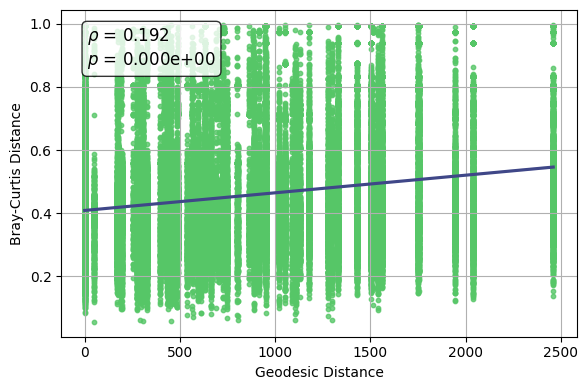

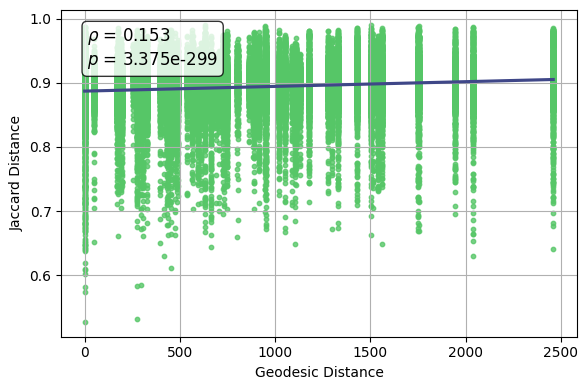

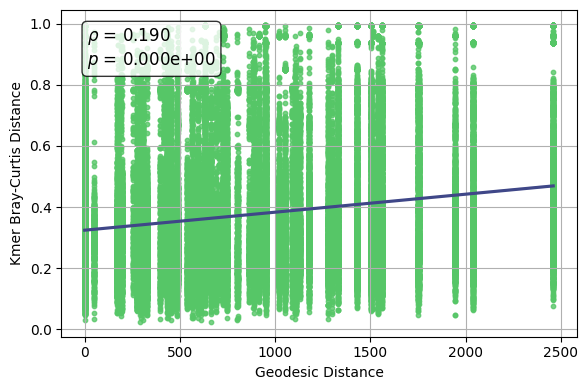

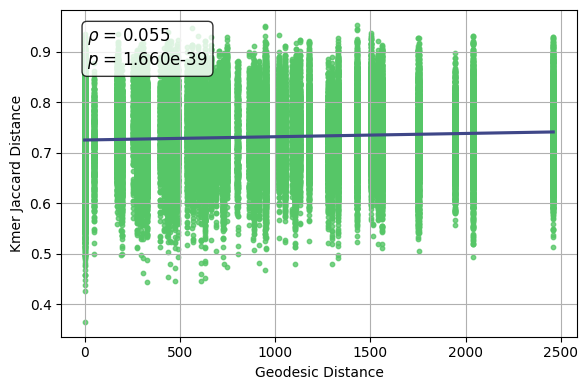

In [26]:
div_dir='must_cm10000'
kmer_dir='must_kmer_cm10000'

bray_curtis_path = f'{div_dir}/bray_curtis_distance_matrix/distance-matrix.tsv'
jaccard_path = f'{div_dir}/jaccard_distance_matrix/distance-matrix.tsv'
bray_curtis_kmer_path = f'{kmer_dir}/bray_curtis_distance_matrix/distance-matrix.tsv'
jaccard_kmer_path = f'{kmer_dir}/jaccard_distance_matrix/distance-matrix.tsv'

# Mantel test 
rho_bray, p_bray = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_path,
    x_label='Geodesic Distance', y_label='Bray-Curtis Distance')

rho_jaccard, p_jaccard = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=jaccard_path,
    x_label='Geodesic Distance', y_label='Jaccard Distance')

rho_bray_kmer, p_bray_kmer = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_kmer_path,
    x_label='Geodesic Distance', y_label='Kmer Bray-Curtis Distance')

rho_jaccard_kmer, p_jaccard_kmer = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=jaccard_kmer_path,
    x_label='Geodesic Distance', y_label='Kmer Jaccard Distance')

In [27]:
# results as df 
results = {'Test': ['Bray-Curtis', 'Jaccard', 'Kmer Bray-Curtis', 'Kmer Jaccard'],
    'Rho': [rho_bray, rho_jaccard, rho_bray_kmer, rho_jaccard_kmer],
    'p-val': [p_bray, p_jaccard, p_bray_kmer, p_jaccard_kmer]}

results_df = pd.DataFrame(results)

results_df

,Test,Rho,p-val
0,Bray-Curtis,0.191692,0.000000e+00
1,Jaccard,0.153099,3.375337e-299
2,Kmer Bray-Curtis,0.190266,0.000000e+00
3,Kmer Jaccard,0.054745,1.659670e-39


<hr>

# STOPPED HERRE

# SUBSET TO SINGLE YEAR 

# Diversity 

In [103]:
#!mkdir /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/berries/2021

In [104]:
workdir = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/berries/2021'
%cd $workdir

/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/berries/2021


In [73]:
%%bash 

# subset to only harvest samples before fitting 
qiime feature-table filter-samples \
  --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/must_filtered_table.qza \
  --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
  --p-where "[Collection_ID]='Harvest_2021'" \
  --o-filtered-table must_21_filtered_table.qza

qiime feature-table filter-seqs \
    --i-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/Sven-denoising-test/ITS/revcomp-trimmed-denoised/with-adjusted-parameters/ITS-revcomp-trimmed-ER-0.05-denoised-trunc-190-PFA-4.0-maxee-4.0-rep-seqs.qza \
    --i-table must_21_filtered_table.qza \
    --o-filtered-data must_21_filtered_rep_seqs.qza

Saved FeatureTable[Frequency] to: must_21_filtered_table.qza
Saved FeatureData[Sequence] to: must_21_filtered_rep_seqs.qza


In [105]:
table = q2.Artifact.load('must_21_filtered_table.qza')

core_div_dict = {}
core_div = q2d.actions.core_metrics(table=table,
                                    sampling_depth=depth,
                                    metadata=md, 
                                    n_jobs=threads)
# save outputs
output_dir='must_21_cm{0}/'.format(depth)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for k, v in core_div.__dict__.items():
    if k != '_fields':
        v.save(output_dir + k)
        core_div_dict[k] = v

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.18900461277761615 and the largest is 7.02508077461974.
  warn(


## Kmerizer 

In [106]:
%%bash

qiime kmerizer core-metrics \
    --i-sequences must_21_filtered_rep_seqs.qza \
    --i-table must_21_filtered_table.qza \
    --p-sampling-depth 10000 \
    --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
    --p-n-jobs 'auto' \
    --output-dir must_21_kmer_cm10000/

Saved FeatureTable[Frequency] to: must_21_kmer_cm10000/rarefied_table.qza
Saved FeatureTable[Frequency] to: must_21_kmer_cm10000/kmer_table.qza
Saved SampleData[AlphaDiversity] to: must_21_kmer_cm10000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: must_21_kmer_cm10000/shannon_vector.qza
Saved DistanceMatrix to: must_21_kmer_cm10000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: must_21_kmer_cm10000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: must_21_kmer_cm10000/jaccard_pcoa_results.qza
Saved PCoAResults to: must_21_kmer_cm10000/bray_curtis_pcoa_results.qza
Saved Visualization to: must_21_kmer_cm10000/scatterplot.qzv


## Mantel 

In [107]:
%%bash 

div_dir='must_21_cm10000'
kmer_dir='must_21_kmer_cm10000'

# geodisic distance
#qiime tools export --input-path /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/geodesic_distance_ITS.qza --output-path geodesic_distance_ITS

# distance matrices 
qiime tools export --input-path $div_dir/bray_curtis_distance_matrix.qza --output-path $div_dir/bray_curtis_distance_matrix
qiime tools export --input-path $div_dir/jaccard_distance_matrix.qza --output-path $div_dir/jaccard_distance_matrix
qiime tools export --input-path $kmer_dir/bray_curtis_distance_matrix.qza --output-path $kmer_dir/bray_curtis_distance_matrix
qiime tools export --input-path $kmer_dir/jaccard_distance_matrix.qza --output-path $kmer_dir/jaccard_distance_matrix

Exported must_21_cm10000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory must_21_cm10000/bray_curtis_distance_matrix
Exported must_21_cm10000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory must_21_cm10000/jaccard_distance_matrix
Exported must_21_kmer_cm10000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory must_21_kmer_cm10000/bray_curtis_distance_matrix
Exported must_21_kmer_cm10000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory must_21_kmer_cm10000/jaccard_distance_matrix


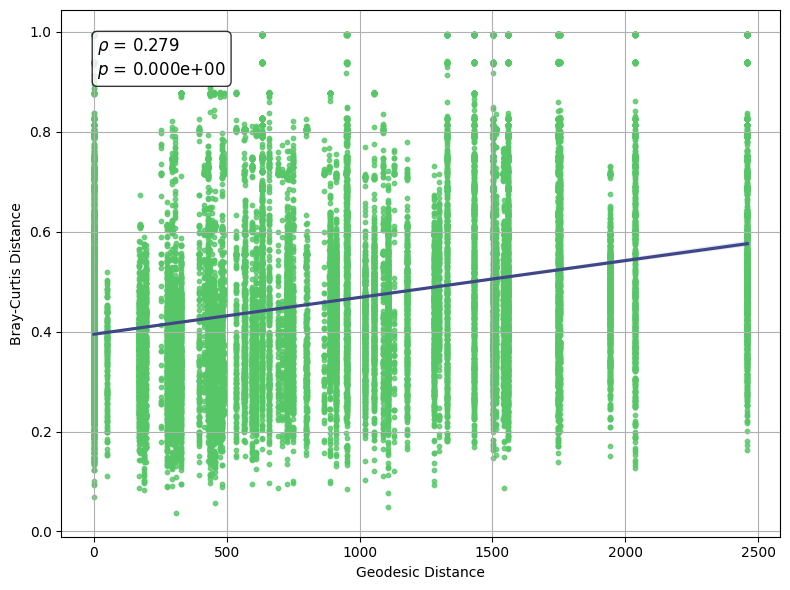

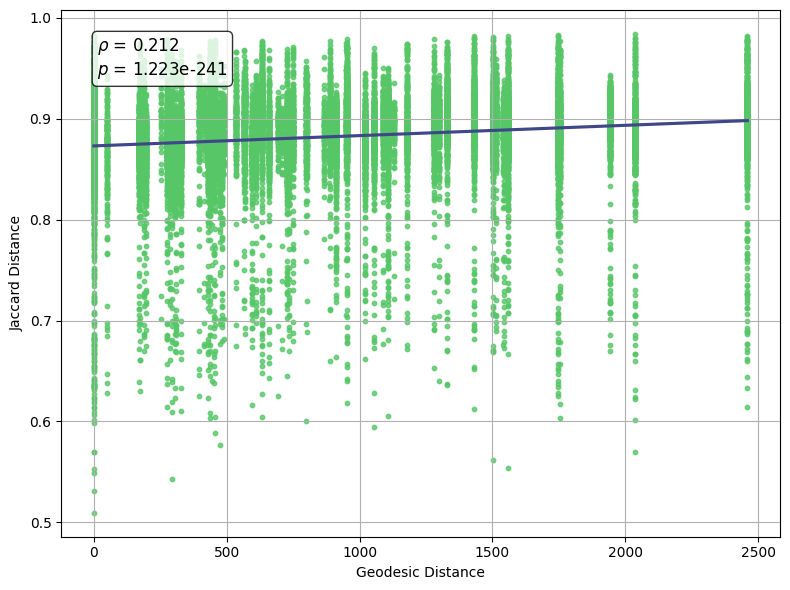

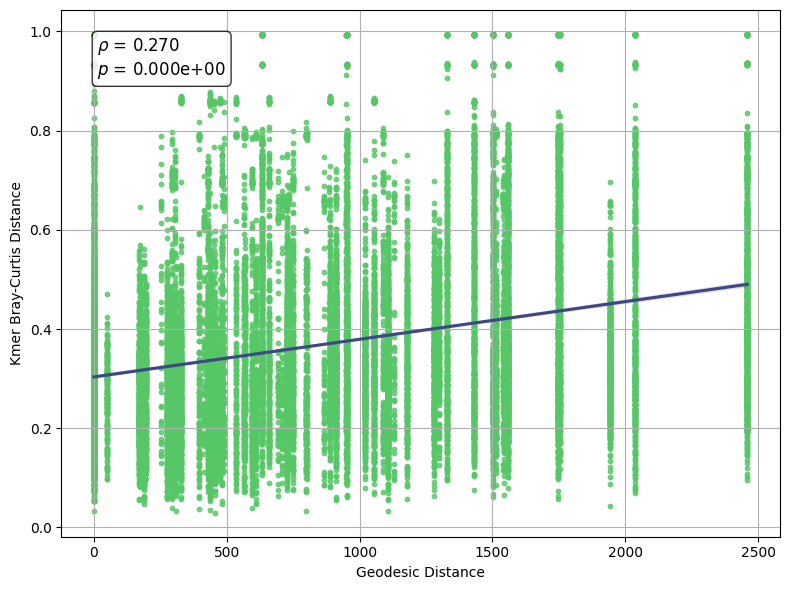

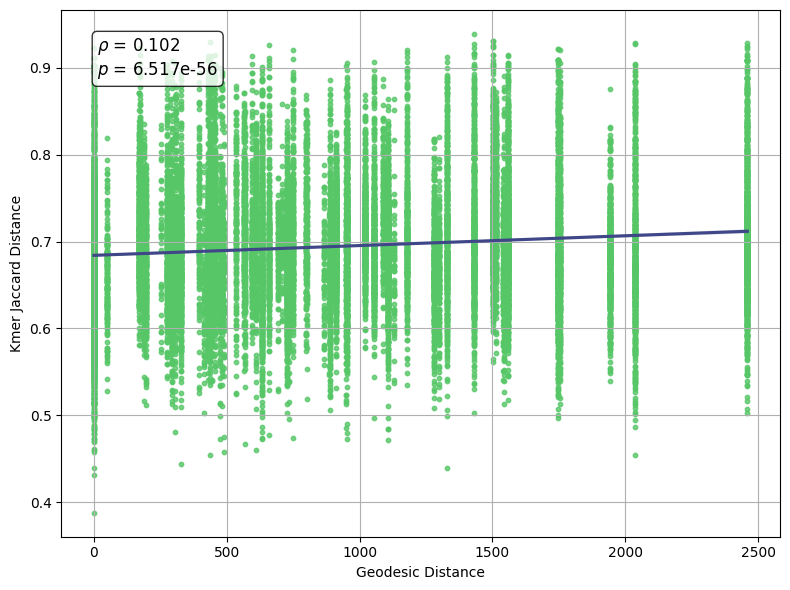

In [108]:
geodesic_path = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/geodesic_distance_ITS/distance-matrix.tsv'

div_dir='must_21_cm10000'
kmer_dir='must_21_kmer_cm10000'

bray_curtis_path = f'{div_dir}/bray_curtis_distance_matrix/distance-matrix.tsv'
jaccard_path = f'{div_dir}/jaccard_distance_matrix/distance-matrix.tsv'
bray_curtis_kmer_path = f'{kmer_dir}/bray_curtis_distance_matrix/distance-matrix.tsv'
jaccard_kmer_path = f'{kmer_dir}/jaccard_distance_matrix/distance-matrix.tsv'

# Mantel test 
rho_bray, p_bray = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_path,
    x_label='Geodesic Distance', y_label='Bray-Curtis Distance')

rho_jaccard, p_jaccard = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=jaccard_path,
    x_label='Geodesic Distance', y_label='Jaccard Distance')

rho_bray_kmer, p_bray_kmer = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_kmer_path,
    x_label='Geodesic Distance', y_label='Kmer Bray-Curtis Distance')

rho_jaccard_kmer, p_jaccard_kmer = mantel_test_and_plot(
    dm_geodesic_path=geodesic_path, dm_other_path=jaccard_kmer_path,
    x_label='Geodesic Distance', y_label='Kmer Jaccard Distance')

In [109]:
# results as df 
results = {'Test': ['Bray-Curtis', 'Jaccard', 'Kmer Bray-Curtis', 'Kmer Jaccard'],
    'Rho': [rho_bray, rho_jaccard, rho_bray_kmer, rho_jaccard_kmer],
    'p-val': [p_bray, p_jaccard, p_bray_kmer, p_jaccard_kmer]}

results_df = pd.DataFrame(results)

results_df

,Test,Rho,p-val
0,Bray-Curtis,0.278933,0.000000e+00
1,Jaccard,0.212413,1.223371e-241
2,Kmer Bray-Curtis,0.269984,0.000000e+00
3,Kmer Jaccard,0.101702,6.517089e-56


<hr>

# DENSE SAMPLING: SUBSET TO SINGLE PLOT IN HARVEST 2021  

-> calculate the Mantel test for every single densely sampled plot 

In [35]:
#!mkdir /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/berries/berries_2021_dense_sampling

In [110]:
workdir = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/berries/berries_2021_dense_sampling'
%cd $workdir

/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/berries/berries_2021_dense_sampling


In [111]:
md_df = md.to_dataframe()
md_df['Plot_ID'].unique()

array(['Lavaux_Plot_4', 'Lavaux_Plot_5', 'Lavaux_Plot_9',
       'Lavaux_Plot_11', 'Lavaux_Plot_12', 'Lavaux_Plot_13',
       'Lavaux_Plot_14', 'Lavaux_Plot_15', 'Lavaux_Plot_18',
       'Lavaux_Plot_19', 'Lavaux_Plot_20', 'Lavaux_Plot_17'], dtype=object)

In [112]:
%%bash 

# Define the list of plots
plots=('Lavaux_Plot_4' 'Lavaux_Plot_5' 'Lavaux_Plot_9' 
       'Lavaux_Plot_11' 'Lavaux_Plot_12' 'Lavaux_Plot_13' 
       'Lavaux_Plot_14' 'Lavaux_Plot_15' 'Lavaux_Plot_18' 
       'Lavaux_Plot_19' 'Lavaux_Plot_20' 'Lavaux_Plot_17')

# Loop through each plot
for plot in "${plots[@]}"
do 
    echo "Processing $plot"
    
    # Create directory for the plot and navigate into it
    mkdir -p "./$plot"
    pushd "./$plot" > /dev/null

    # Filter table and rep seqs
    qiime feature-table filter-samples \
      --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/must_harvest21_filtered_table.qza \
      --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux.tsv \
      --p-where "[Plot_ID]='$plot'" \
      --o-filtered-table must_harvest21_${plot}_filtered_table.qza

    qiime feature-table filter-seqs \
        --i-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/Sven-denoising-test/ITS/revcomp-trimmed-denoised/with-adjusted-parameters/ITS-revcomp-trimmed-ER-0.05-denoised-trunc-190-PFA-4.0-maxee-4.0-rep-seqs.qza \
        --i-table must_harvest21_${plot}_filtered_table.qza \
        --o-filtered-data must_harvest21_${plot}_filtered_rep_seqs.qza

    # Core diversity metrics
    qiime diversity core-metrics \
        --i-table must_harvest21_${plot}_filtered_table.qza \
        --p-sampling-depth 10000 \
        --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux_Harvest21.tsv \
        --p-n-jobs 10 \
        --output-dir cm10000/

    # Kmer diversity
    qiime kmerizer core-metrics \
        --i-sequences must_harvest21_${plot}_filtered_rep_seqs.qza \
        --i-table must_harvest21_${plot}_filtered_table.qza \
        --p-sampling-depth 10000 \
        --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_lavaux_Harvest21.tsv \
        --p-n-jobs auto \
        --output-dir kmer_cm10000/

    # Export all distance matrics for Mantel 
    qiime tools export --input-path cm10000/bray_curtis_distance_matrix.qza --output-path cm10000/bray_curtis_distance_matrix
    qiime tools export --input-path cm10000/jaccard_distance_matrix.qza --output-path cm10000/jaccard_distance_matrix
    qiime tools export --input-path kmer_cm10000/bray_curtis_distance_matrix.qza --output-path kmer_cm10000/bray_curtis_distance_matrix
    qiime tools export --input-path kmer_cm10000/jaccard_distance_matrix.qza --output-path kmer_cm10000/jaccard_distance_matrix

    # Return to the parent directory
    popd > /dev/null
done


Processing Lavaux_Plot_4
Saved FeatureTable[Frequency] to: must_harvest21_Lavaux_Plot_4_filtered_table.qza
Saved FeatureData[Sequence] to: must_harvest21_Lavaux_Plot_4_filtered_rep_seqs.qza
Saved FeatureTable[Frequency] to: cm10000/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: cm10000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: cm10000/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: cm10000/evenness_vector.qza
Saved DistanceMatrix to: cm10000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: cm10000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: cm10000/jaccard_pcoa_results.qza
Saved PCoAResults to: cm10000/bray_curtis_pcoa_results.qza
Saved Visualization to: cm10000/jaccard_emperor.qzv
Saved Visualization to: cm10000/bray_curtis_emperor.qzv
Saved FeatureTable[Frequency] to: kmer_cm10000/rarefied_table.qza
Saved FeatureTable[Frequency] to: kmer_cm10000/kmer_table.qza
Saved SampleData[AlphaDiversity] to: kmer_cm10000/observed_features_ve

Saved DistanceMatrix to: cm10000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: cm10000/jaccard_pcoa_results.qza
Saved PCoAResults to: cm10000/bray_curtis_pcoa_results.qza
Saved Visualization to: cm10000/jaccard_emperor.qzv
Saved Visualization to: cm10000/bray_curtis_emperor.qzv
Saved FeatureTable[Frequency] to: kmer_cm10000/rarefied_table.qza
Saved FeatureTable[Frequency] to: kmer_cm10000/kmer_table.qza
Saved SampleData[AlphaDiversity] to: kmer_cm10000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: kmer_cm10000/shannon_vector.qza
Saved DistanceMatrix to: kmer_cm10000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: kmer_cm10000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: kmer_cm10000/jaccard_pcoa_results.qza
Saved PCoAResults to: kmer_cm10000/bray_curtis_pcoa_results.qza
Saved Visualization to: kmer_cm10000/scatterplot.qzv
Exported cm10000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory cm10000/bray_curtis_distance_

Saved DistanceMatrix to: kmer_cm10000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: kmer_cm10000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: kmer_cm10000/jaccard_pcoa_results.qza
Saved PCoAResults to: kmer_cm10000/bray_curtis_pcoa_results.qza
Saved Visualization to: kmer_cm10000/scatterplot.qzv
Exported cm10000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory cm10000/bray_curtis_distance_matrix
Exported cm10000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory cm10000/jaccard_distance_matrix
Exported kmer_cm10000/bray_curtis_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory kmer_cm10000/bray_curtis_distance_matrix
Exported kmer_cm10000/jaccard_distance_matrix.qza as DistanceMatrixDirectoryFormat to directory kmer_cm10000/jaccard_distance_matrix
Processing Lavaux_Plot_19
Saved FeatureTable[Frequency] to: must_harvest21_Lavaux_Plot_19_filtered_table.qza
Saved FeatureData[Sequence] to: must_harvest21_Lav

###  Mantel tests 

In [113]:
sys.path.append('/home/lfloerl/microterroir/Microbiome/Other_scripts/')
from mantel_ITS import mantel_test_and_plot

#!qiime tools export --input-path /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/geodesic_distance_ITS-HR.qza --output-path /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/berries/berries_2021_dense_sampling/geodesic_distance_ITS_HR

Exported /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/geodesic_distance_ITS-HR.qza as DistanceMatrixDirectoryFormat to directory /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/spatio-temporal/berries/berries_2021_dense_sampling/geodesic_distance_ITS_HR


Running Mantel tests for Lavaux_Plot_4...


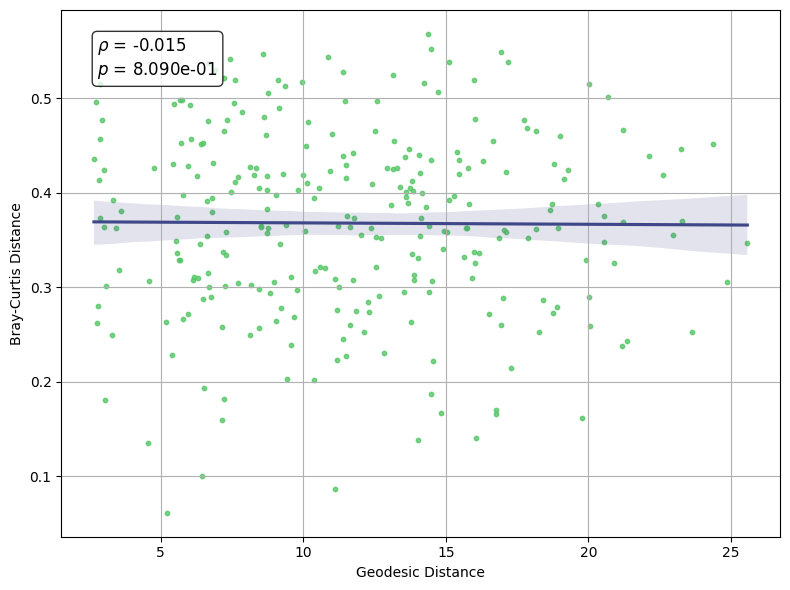

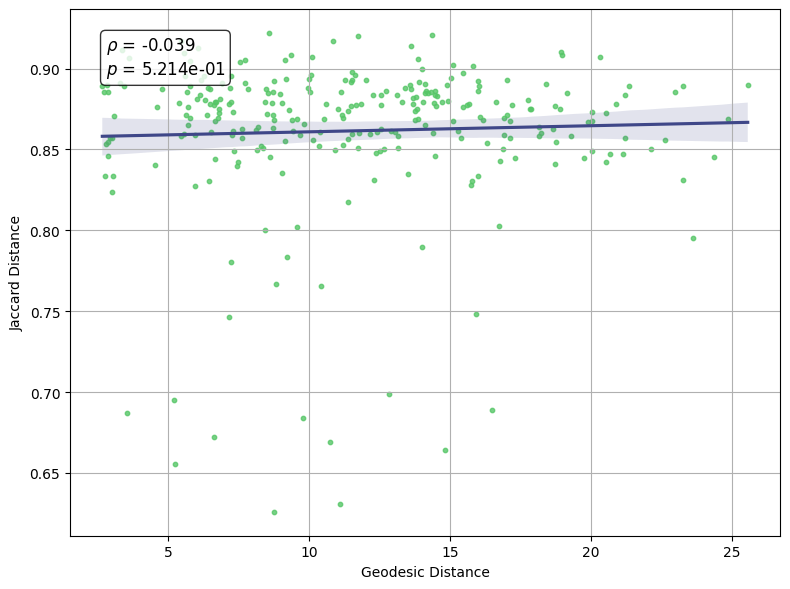

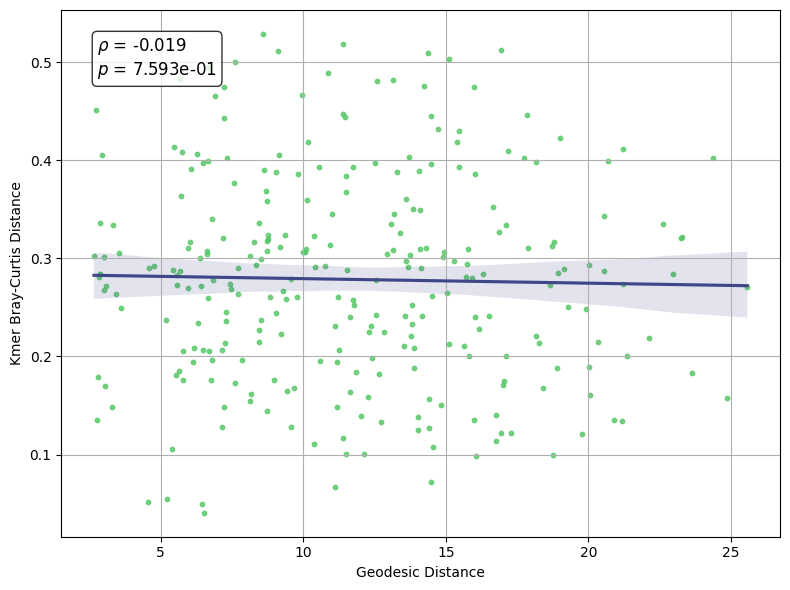

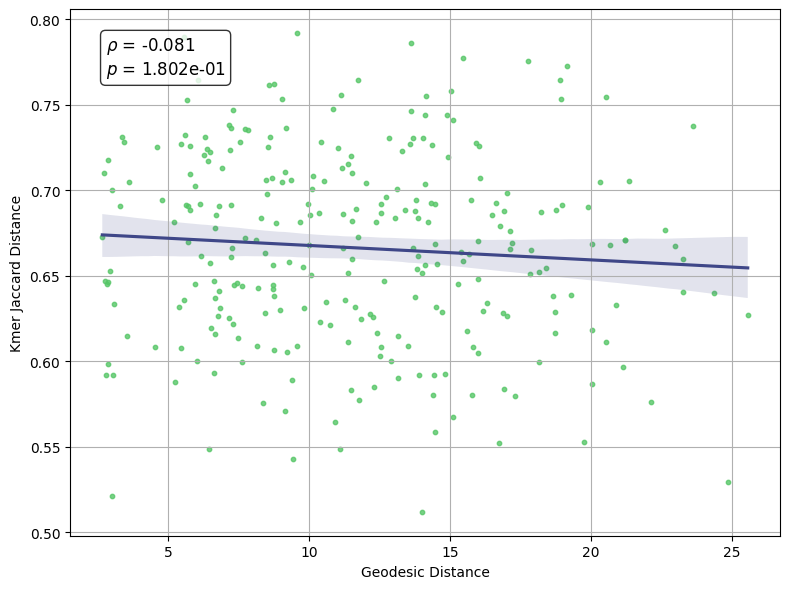

Running Mantel tests for Lavaux_Plot_5...


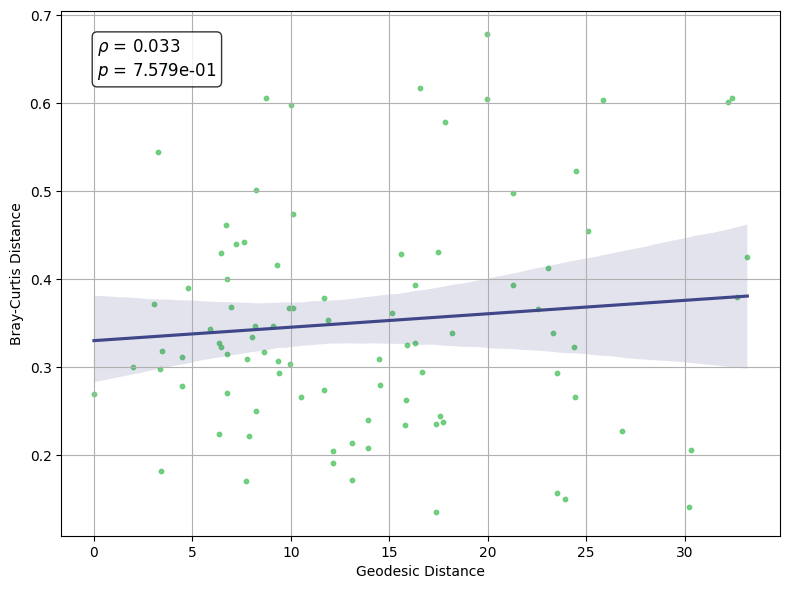

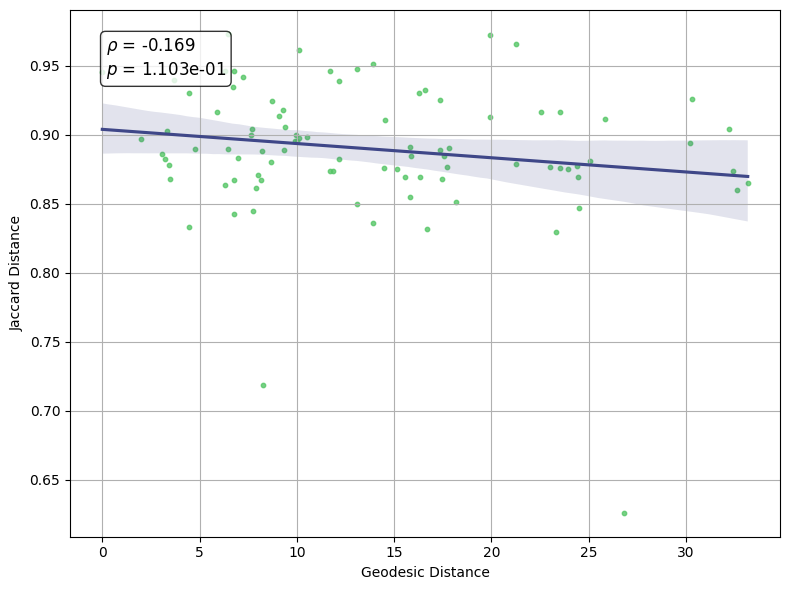

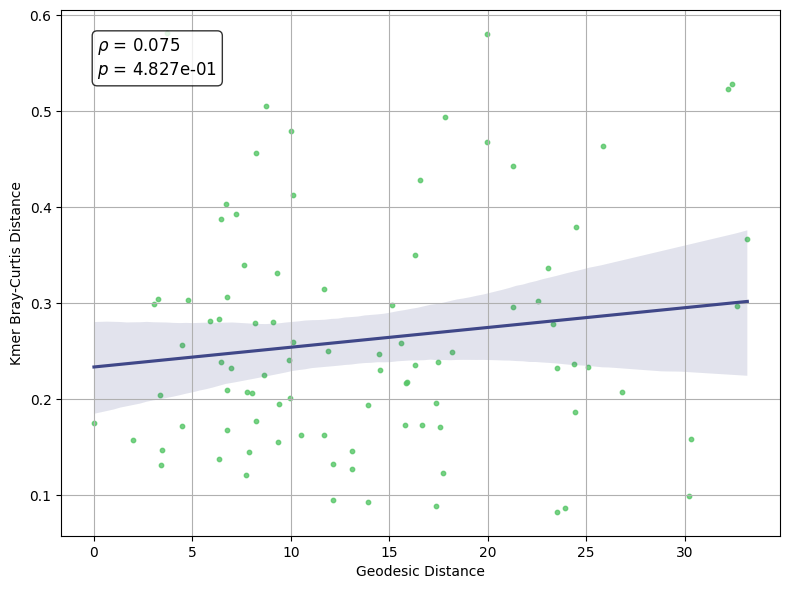

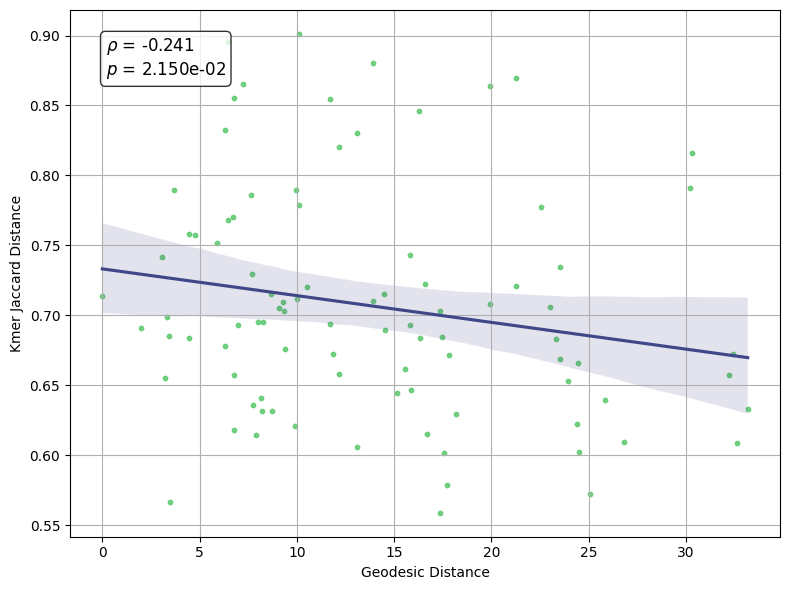

Running Mantel tests for Lavaux_Plot_9...


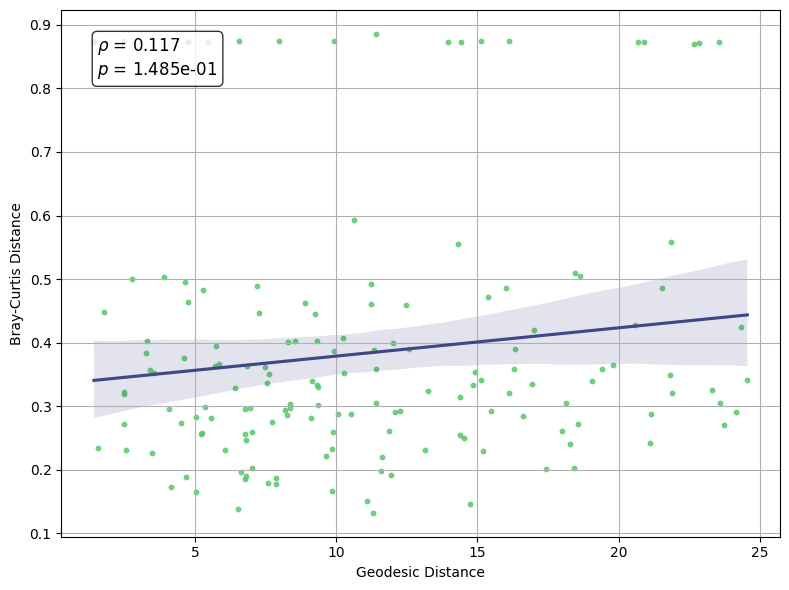

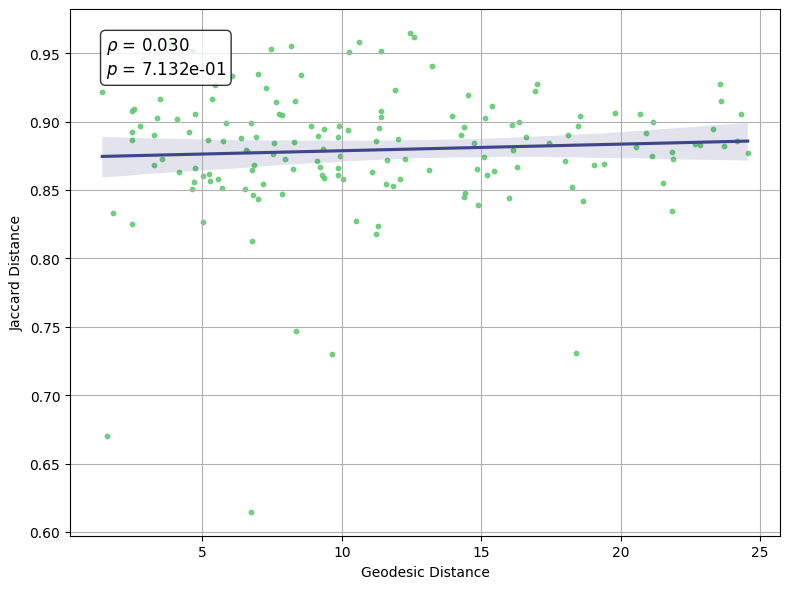

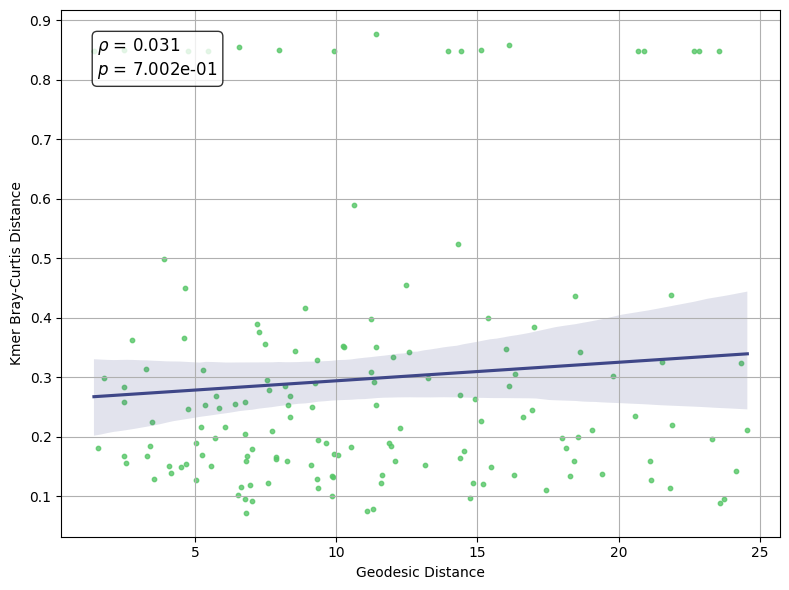

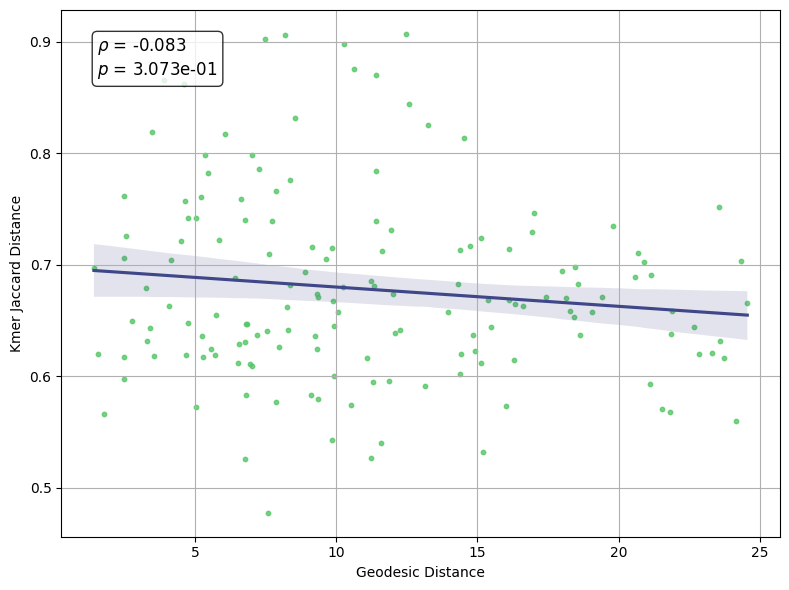

Running Mantel tests for Lavaux_Plot_11...


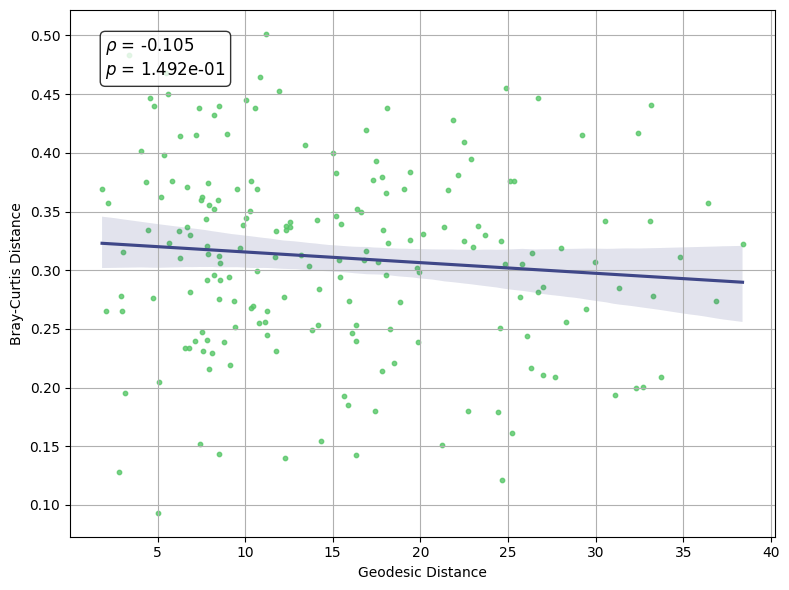

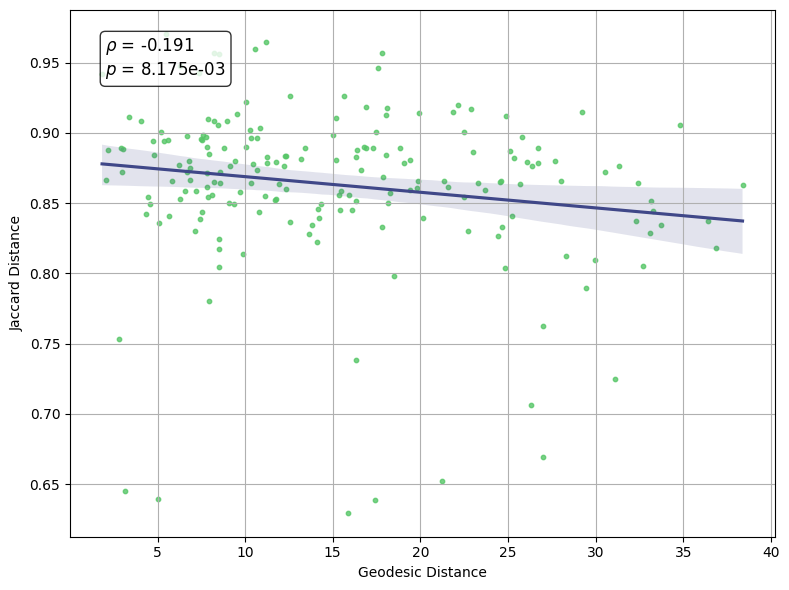

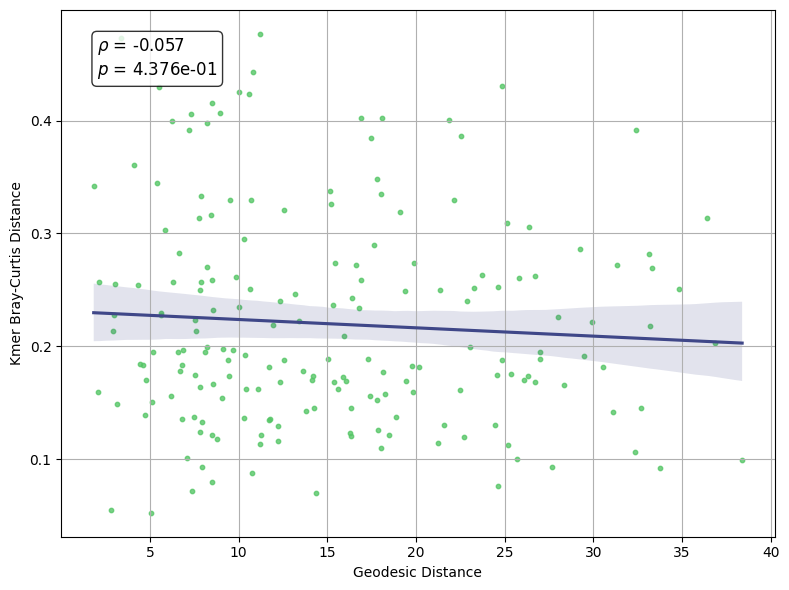

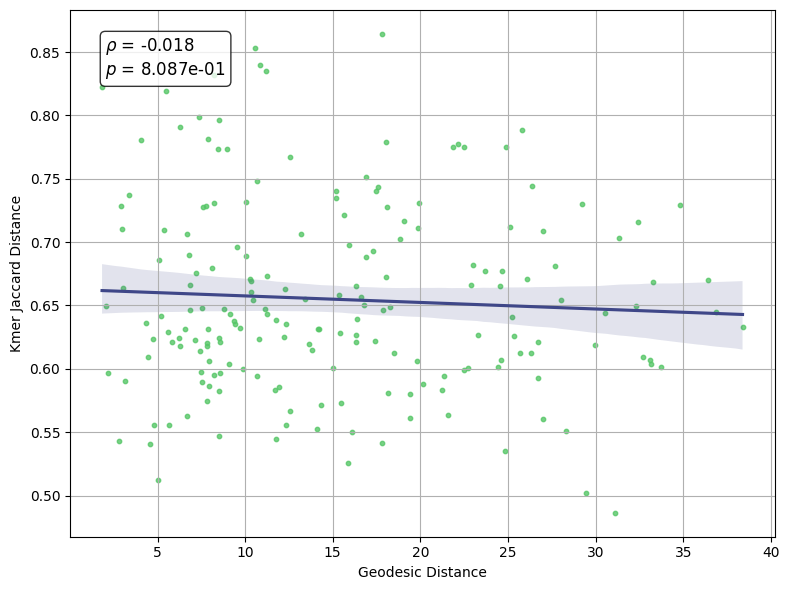

Running Mantel tests for Lavaux_Plot_12...


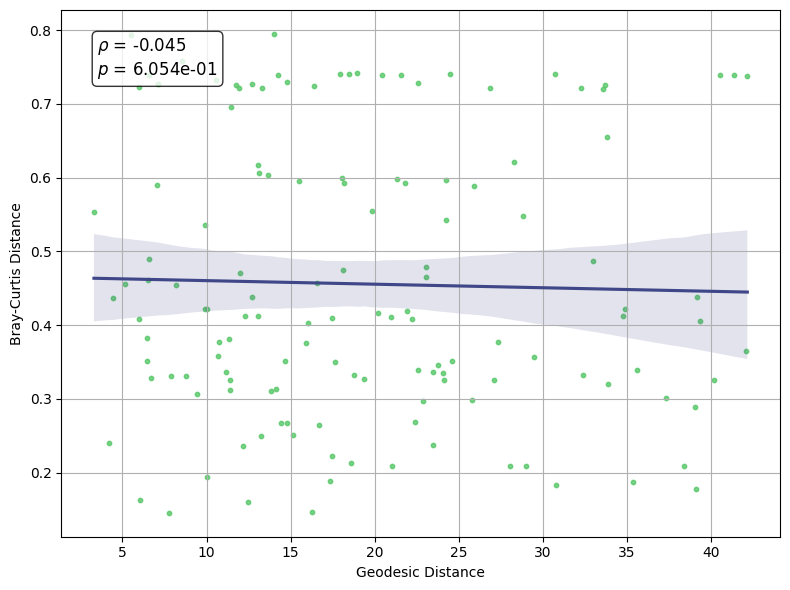

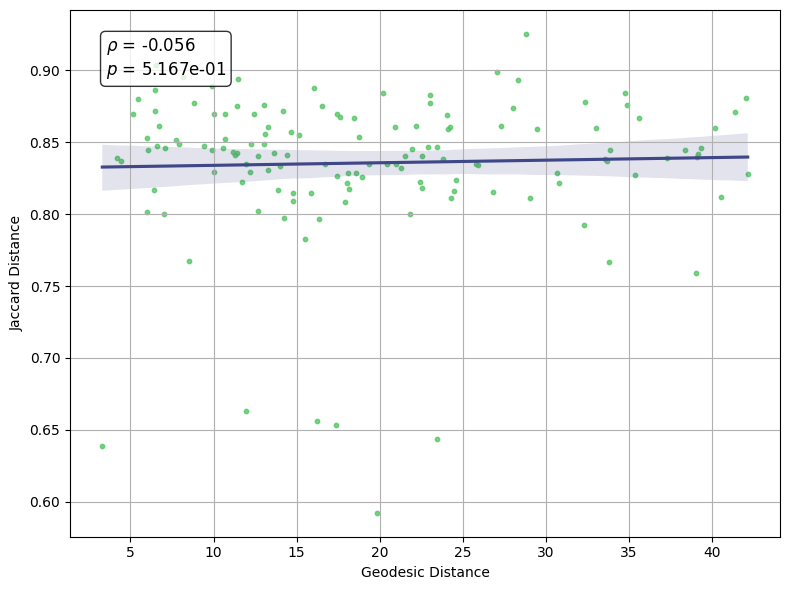

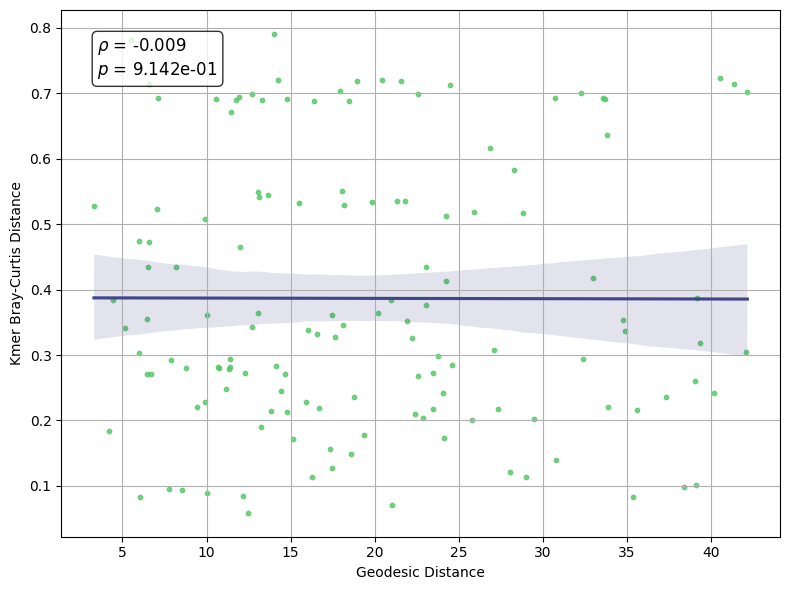

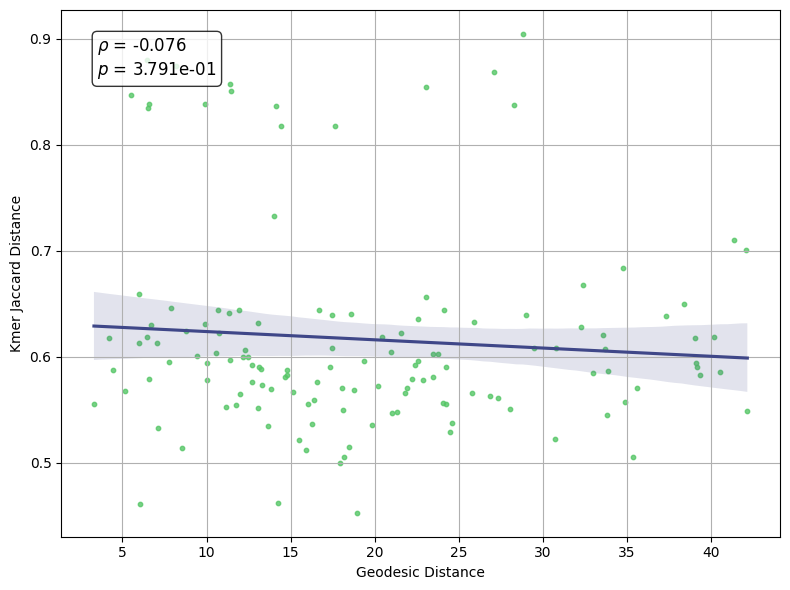

Running Mantel tests for Lavaux_Plot_13...


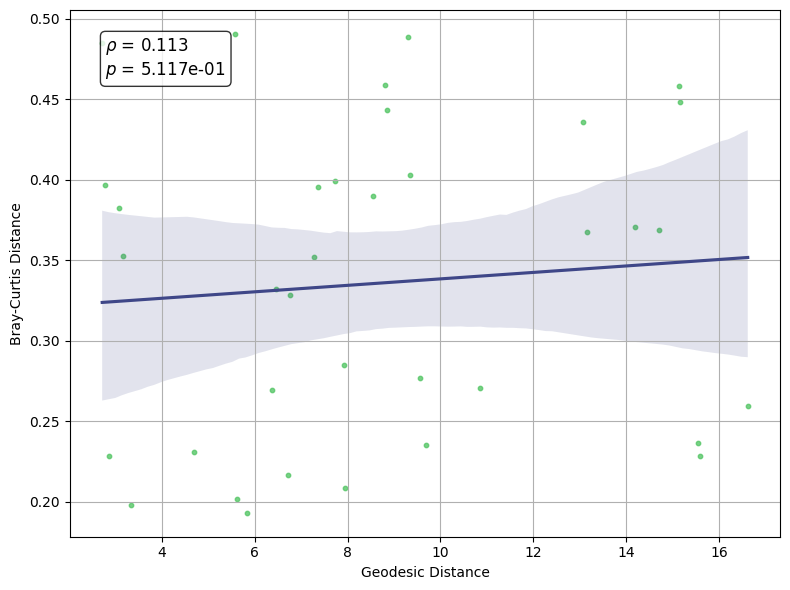

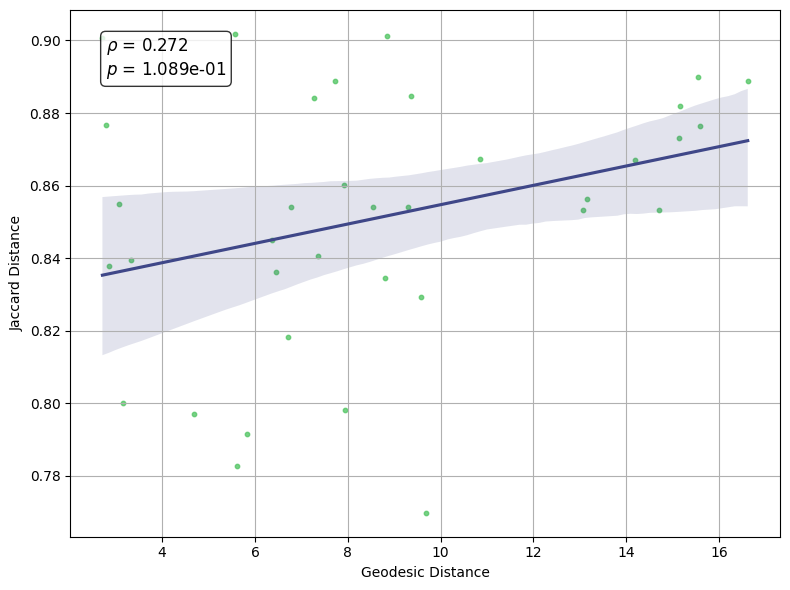

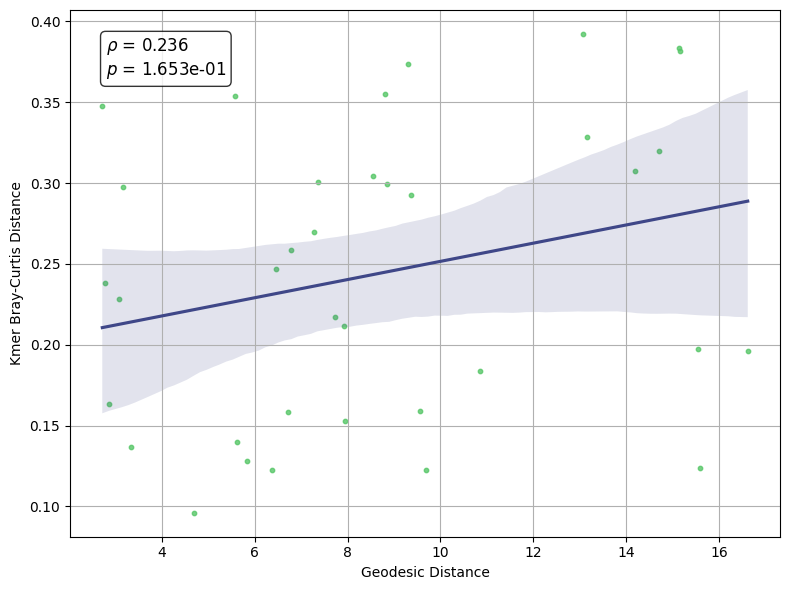

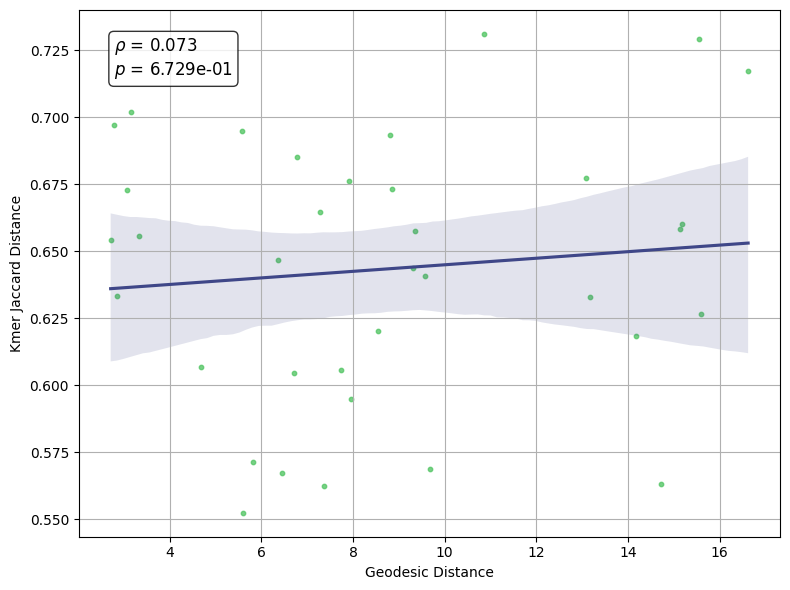

Running Mantel tests for Lavaux_Plot_14...


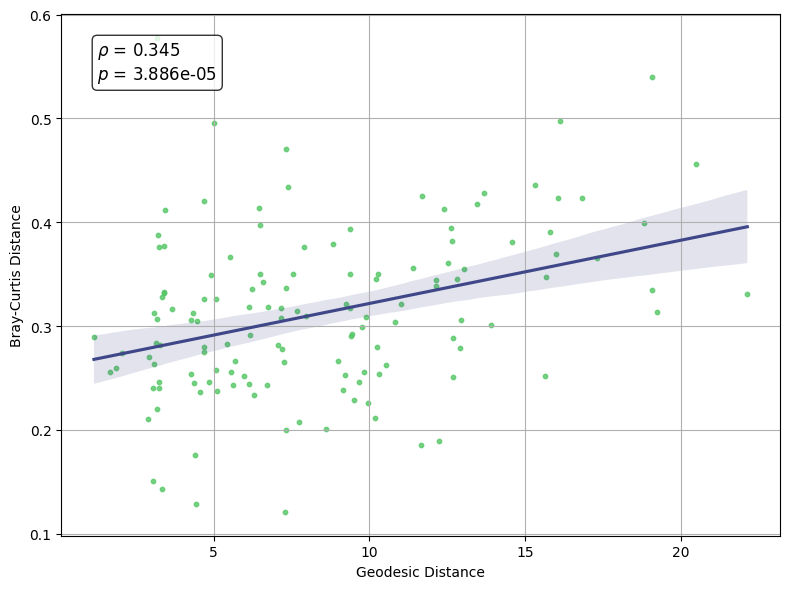

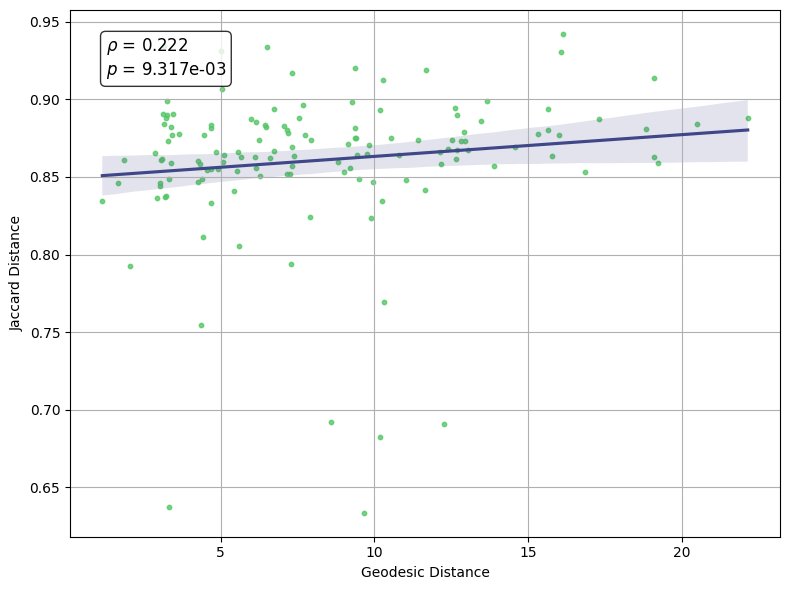

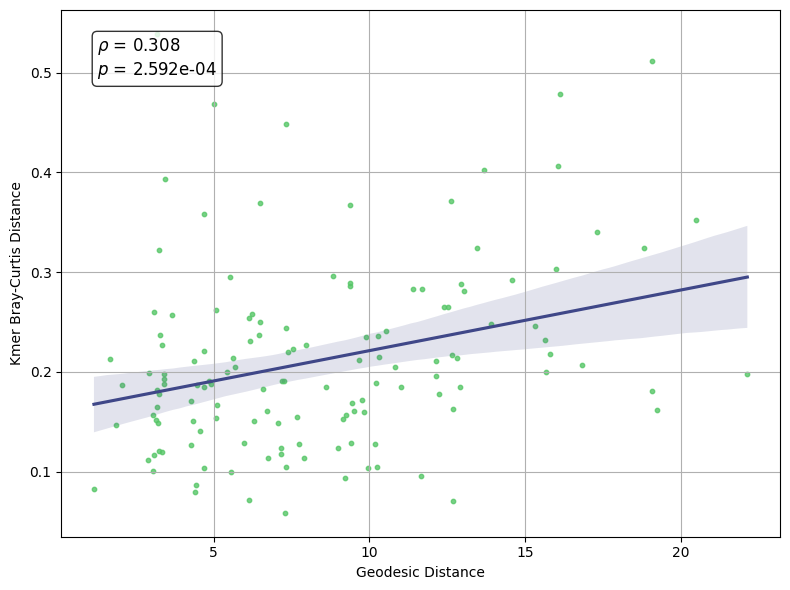

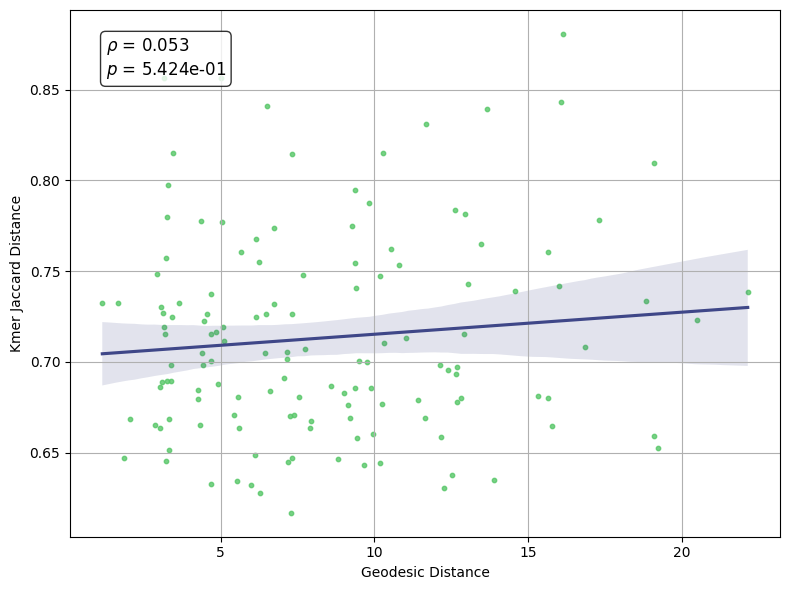

Running Mantel tests for Lavaux_Plot_15...


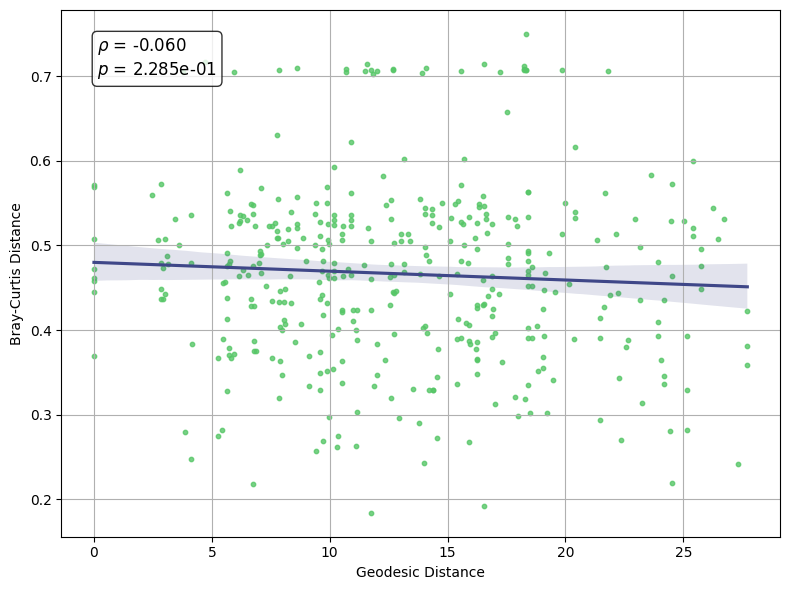

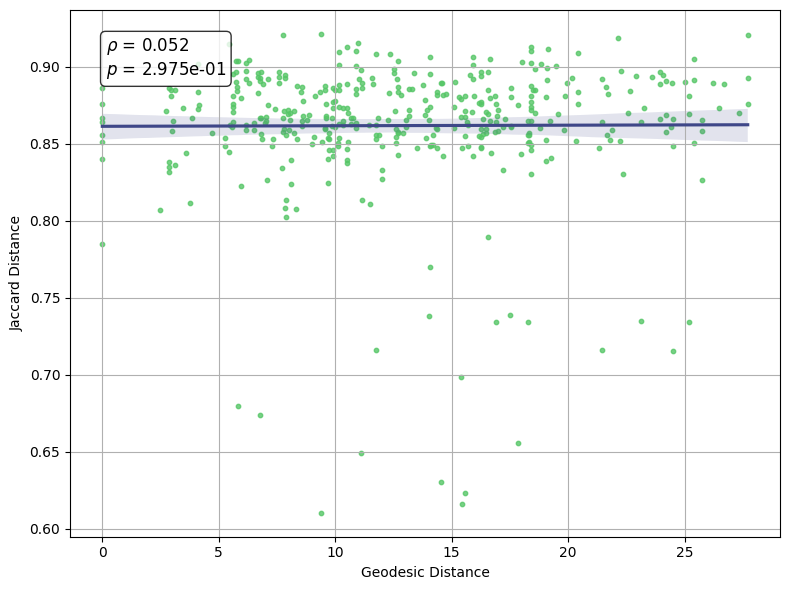

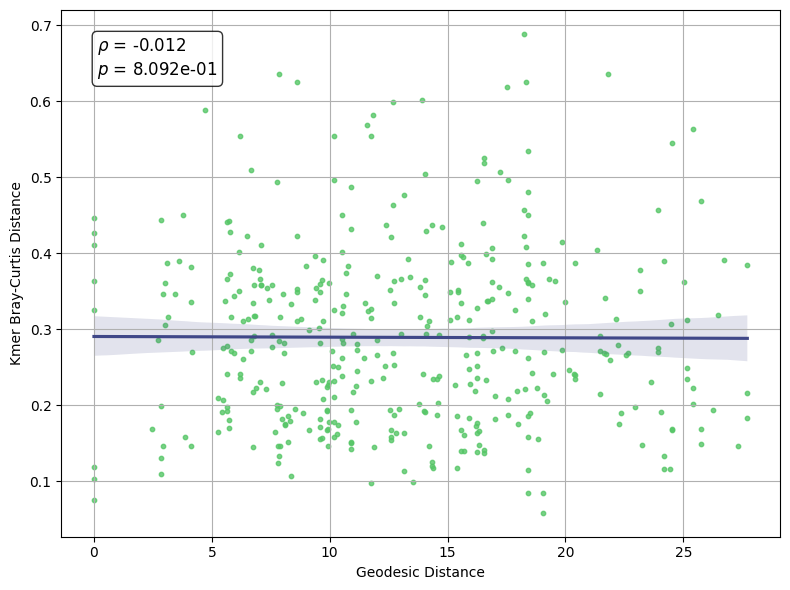

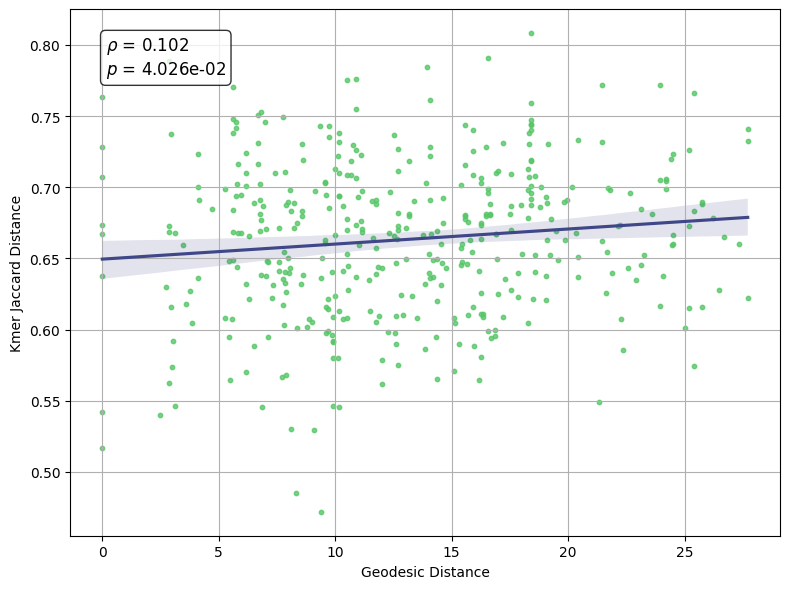

Running Mantel tests for Lavaux_Plot_18...


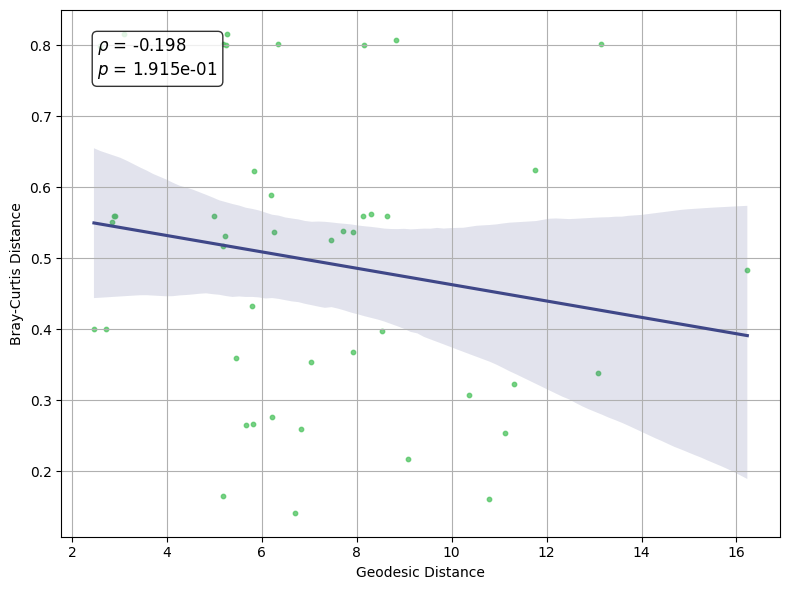

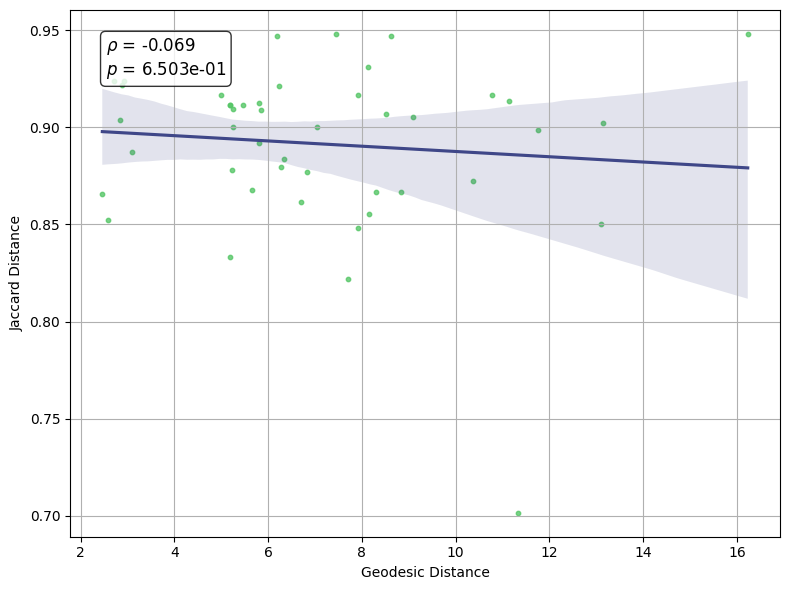

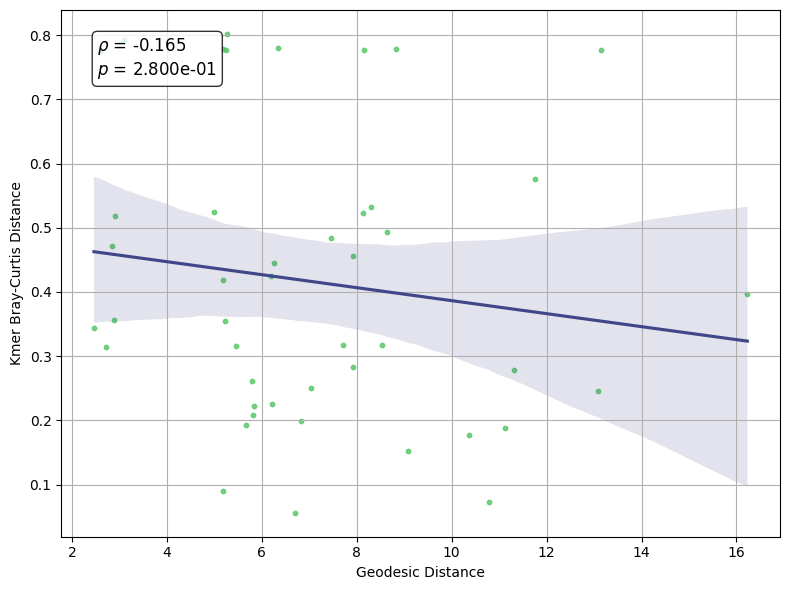

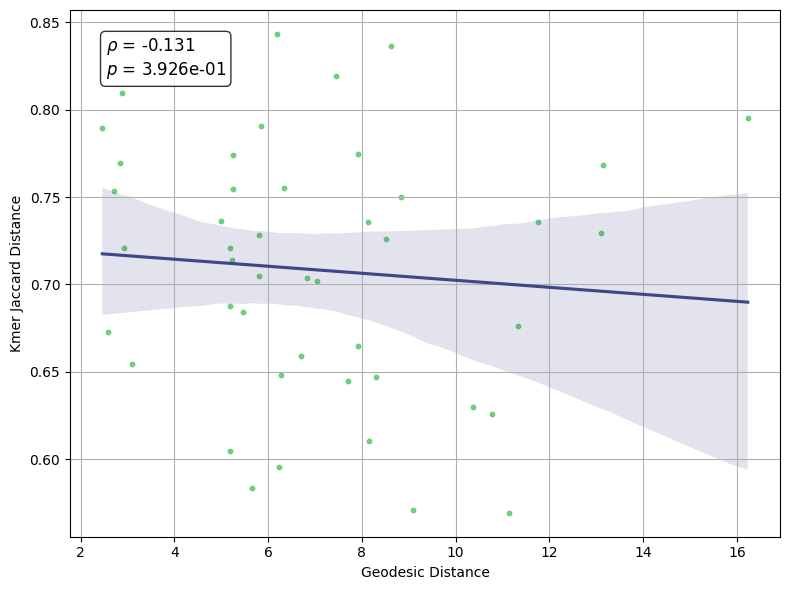

Running Mantel tests for Lavaux_Plot_19...


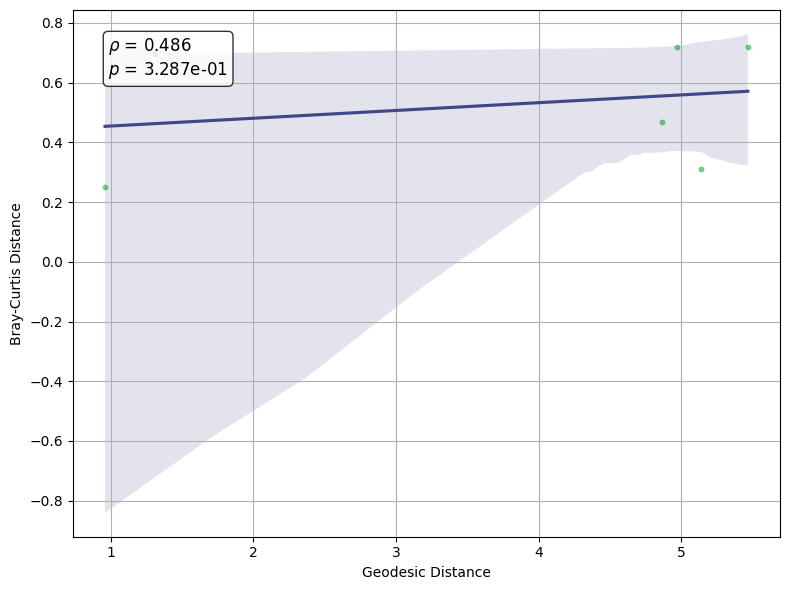

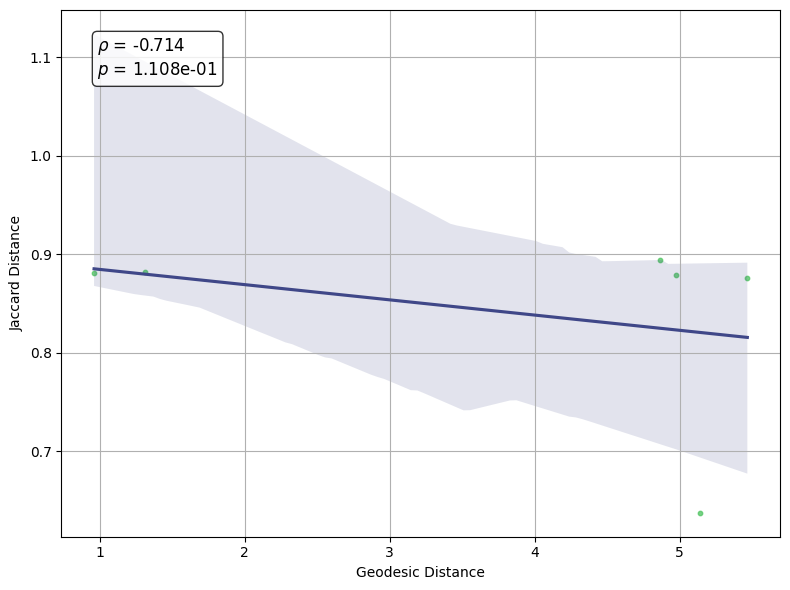

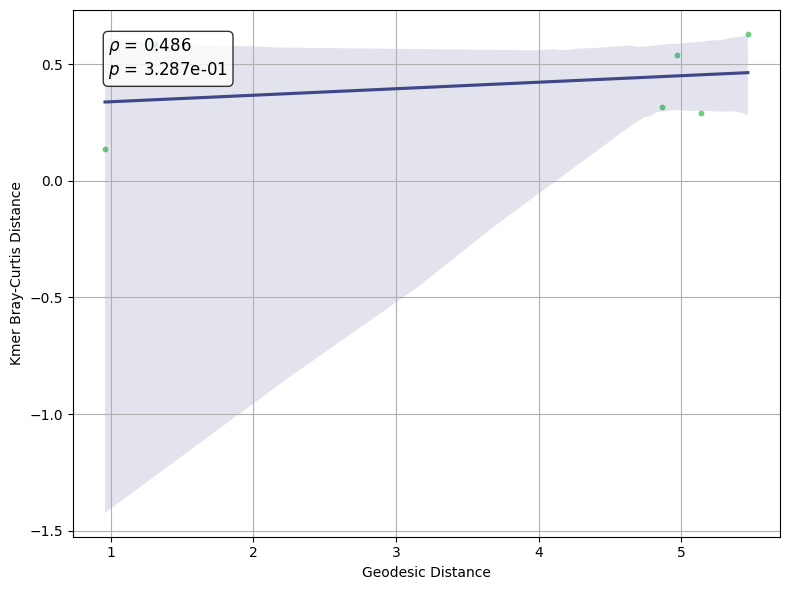

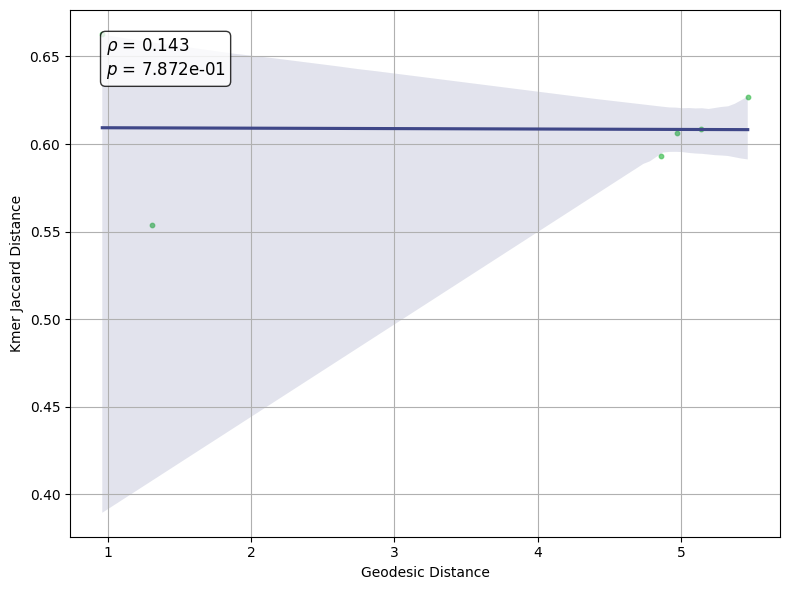

Running Mantel tests for Lavaux_Plot_20...


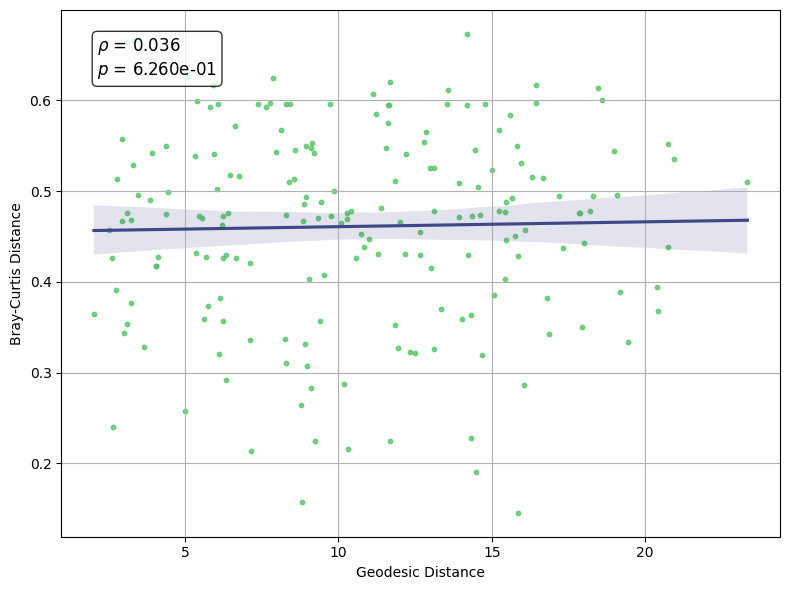

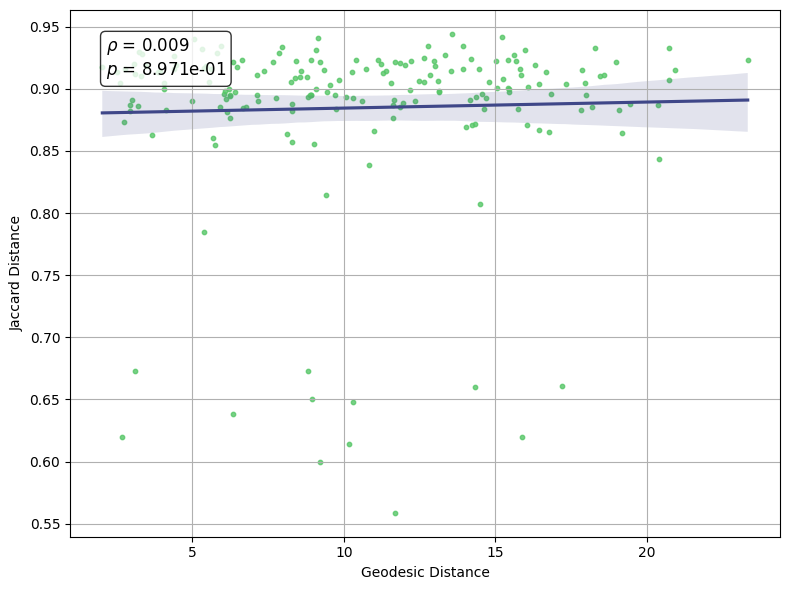

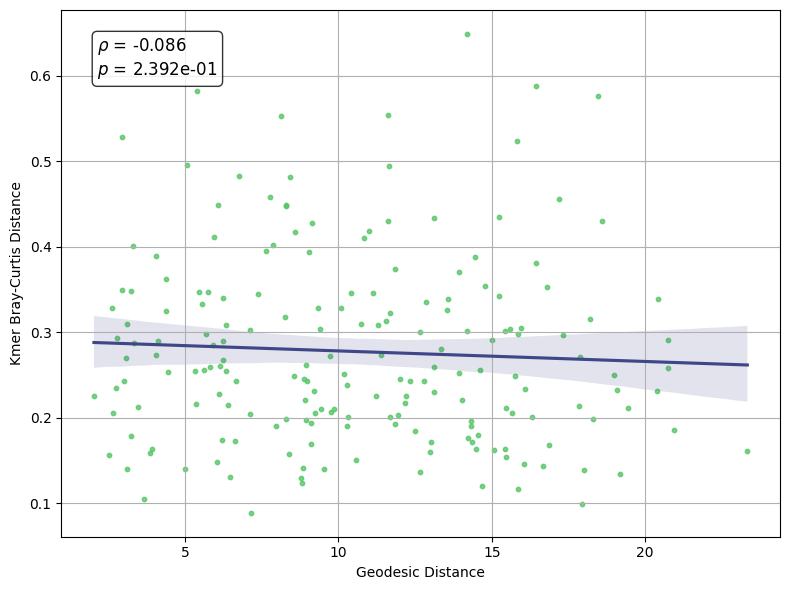

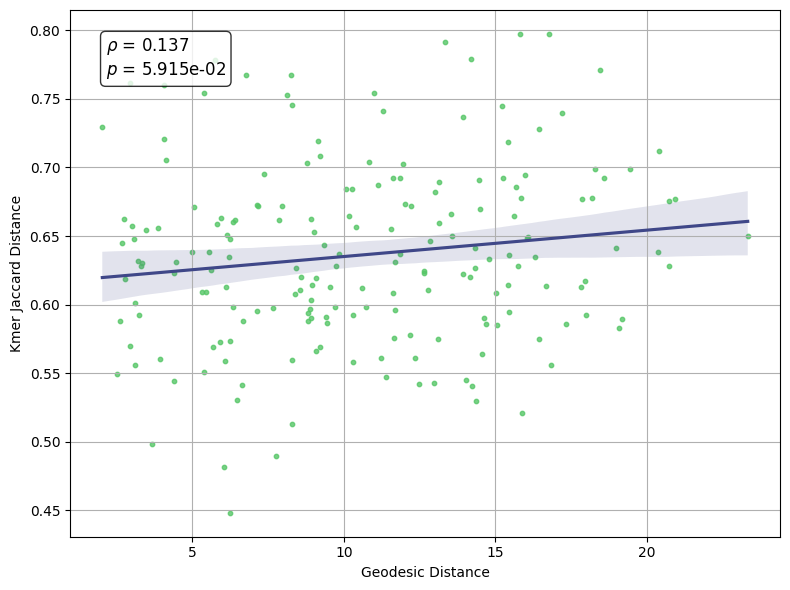

Running Mantel tests for Lavaux_Plot_17...


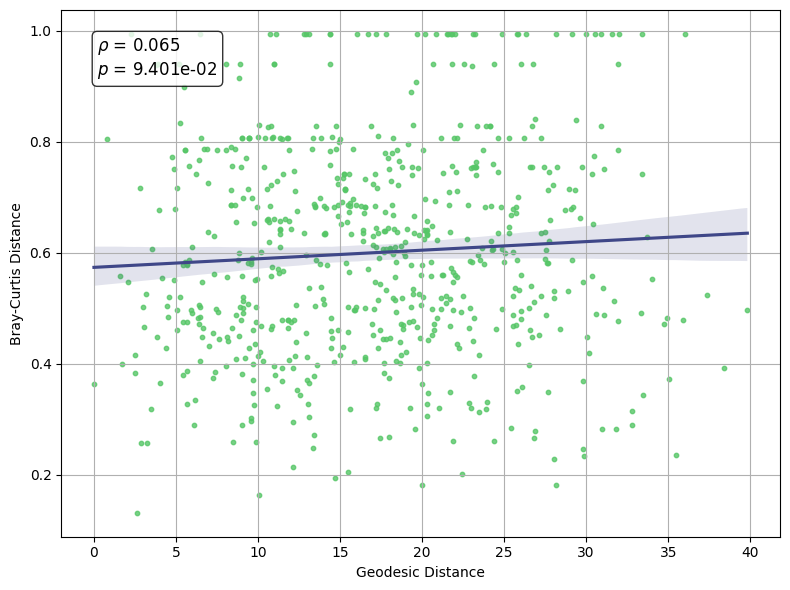

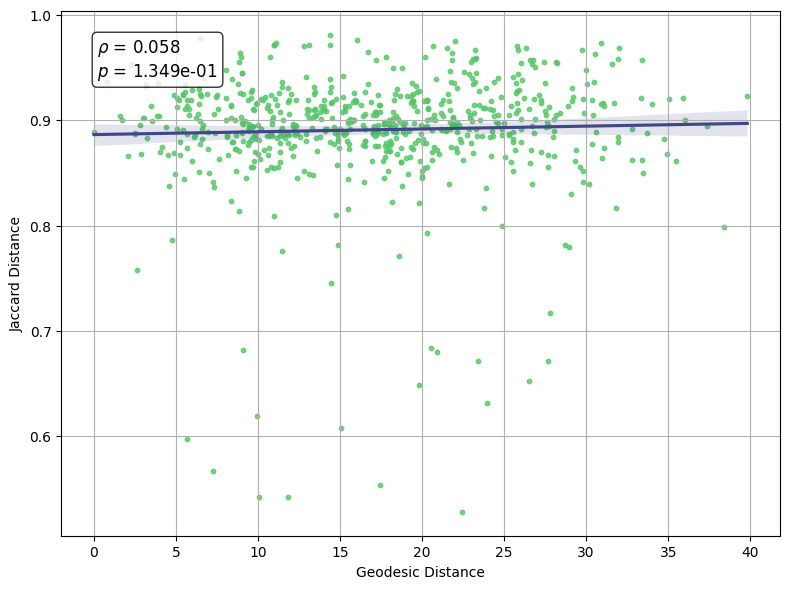

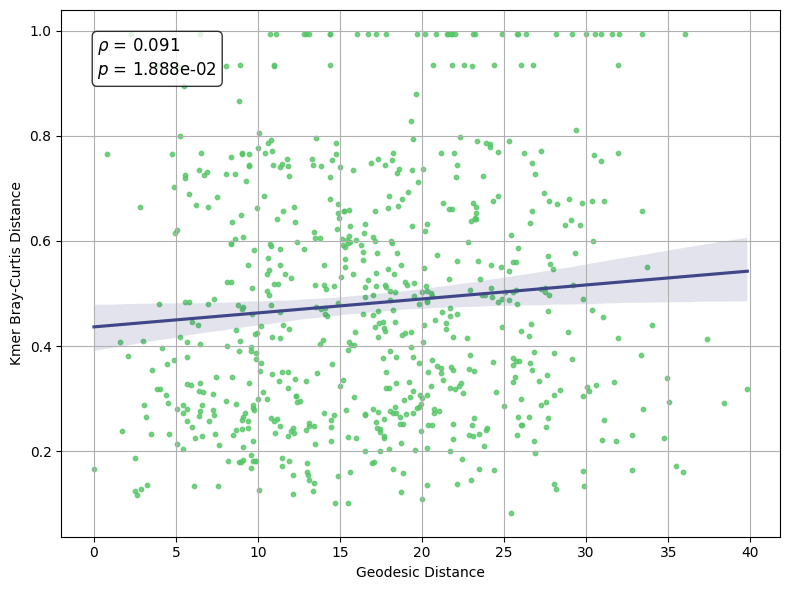

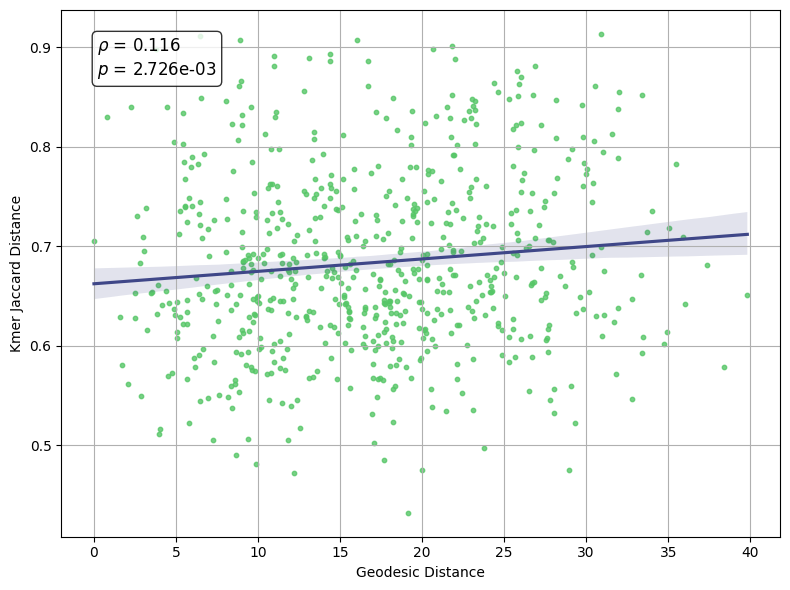

In [114]:
# Geodesic distance matrix path
geodesic_path = 'geodesic_distance_ITS_HR/distance-matrix.tsv'

# Plots
plots = ['Lavaux_Plot_4', 'Lavaux_Plot_5', 'Lavaux_Plot_9', 'Lavaux_Plot_11', 'Lavaux_Plot_12', 
         'Lavaux_Plot_13', 'Lavaux_Plot_14', 'Lavaux_Plot_15', 'Lavaux_Plot_18', 'Lavaux_Plot_19', 
         'Lavaux_Plot_20', 'Lavaux_Plot_17']

# Function to run mantel tests for each plot directory
def run_mantel_tests_for_plots(plots, geodesic_path):
    all_results = []
    for plot in plots:
        print(f"Running Mantel tests for {plot}...")  # Print the plot name
        
        div_dir = f"{plot}/cm10000"
        kmer_dir = f"{plot}/kmer_cm10000"
        
        # Define paths for distance matrices
        bray_curtis_path = os.path.join(div_dir, 'bray_curtis_distance_matrix', 'distance-matrix.tsv')
        jaccard_path = os.path.join(div_dir, 'jaccard_distance_matrix', 'distance-matrix.tsv')
        bray_curtis_kmer_path = os.path.join(kmer_dir, 'bray_curtis_distance_matrix', 'distance-matrix.tsv')
        jaccard_kmer_path = os.path.join(kmer_dir, 'jaccard_distance_matrix', 'distance-matrix.tsv')

        # Run Mantel tests for Bray-Curtis and Jaccard matrices
        rho_bray, p_bray = mantel_test_and_plot(
            dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_path,
            x_label='Geodesic Distance', y_label='Bray-Curtis Distance')
        
        # Display the plot
        plt.show()

        rho_jaccard, p_jaccard = mantel_test_and_plot(
            dm_geodesic_path=geodesic_path, dm_other_path=jaccard_path,
            x_label='Geodesic Distance', y_label='Jaccard Distance')
        
        # Display the plot
        plt.show()

        rho_bray_kmer, p_bray_kmer = mantel_test_and_plot(
            dm_geodesic_path=geodesic_path, dm_other_path=bray_curtis_kmer_path,
            x_label='Geodesic Distance', y_label='Kmer Bray-Curtis Distance')
        
        # Display the plot
        plt.show()

        rho_jaccard_kmer, p_jaccard_kmer = mantel_test_and_plot(
            dm_geodesic_path=geodesic_path, dm_other_path=jaccard_kmer_path,
            x_label='Geodesic Distance', y_label='Kmer Jaccard Distance')
        
        # Display the plot
        plt.show()

        # Store the results in a dictionary and append to list
        results = {
            'Test': ['Bray-Curtis', 'Jaccard', 'Kmer Bray-Curtis', 'Kmer Jaccard'],
            'Rho': [rho_bray, rho_jaccard, rho_bray_kmer, rho_jaccard_kmer],
            'p-val': [p_bray, p_jaccard, p_bray_kmer, p_jaccard_kmer]
        }

        # Convert to dataframe and add to list of results
        results_df = pd.DataFrame(results)
        results_df['Plot'] = plot
        all_results.append(results_df)

    # Concatenate all the results into one dataframe
    final_results_df = pd.concat(all_results, ignore_index=True)
    return final_results_df

# Run the mantel tests and get the results
final_results_df = run_mantel_tests_for_plots(plots, geodesic_path)


In [115]:
# Display the final results dataframe
final_results_df

,Test,Rho,p-val,Plot
0,Bray-Curtis,-0.014617,0.808972,Lavaux_Plot_4
1,Jaccard,-0.038753,0.521432,Lavaux_Plot_4
2,Kmer Bray-Curtis,-0.018526,0.759295,Lavaux_Plot_4
3,Kmer Jaccard,-0.080904,0.180191,Lavaux_Plot_4
4,Bray-Curtis,0.032762,0.757862,Lavaux_Plot_5
5,Jaccard,-0.168538,0.110273,Lavaux_Plot_5
6,Kmer Bray-Curtis,0.074522,0.482653,Lavaux_Plot_5
7,Kmer Jaccard,-0.240782,0.021499,Lavaux_Plot_5
8,Bray-Curtis,0.117361,0.148522,Lavaux_Plot_9
9,Jaccard,0.029952,0.713227,Lavaux_Plot_9
